<a href="https://colab.research.google.com/github/MustaphaElkady/MustaphaElkady/blob/main/building_good_training_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data1/house_prices.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [ ]:
df.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


 # Dealing with missing data

we can use
the isnull method to return a DataFrame with Boolean values that indicate whether a cell contains
a numeric value (False) or if data is missing (True).

Using the sum method, we can then return the
number of missing values per column as follows:

In [ ]:
df.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


##  Eliminating training examples or features with missing values

One of the easiest ways to deal with missing data is simply to remove the corresponding features
(columns) or training examples (rows) from the dataset entirely; rows with missing values can easily
be dropped via the dropna method

In [ ]:
df_droped01 = df.dropna(axis = 0)

In [ ]:
df_droped01.isnull().sum()

,0
Index,0
Title,0
Description,0
Amount(in rupees),0
Price (in rupees),0
location,0
Carpet Area,0
Status,0
Floor,0
Transaction,0


- we can drop columns that have at least one NaN in any row by setting the axis argument to 1

In [ ]:
df_droped02 = df.dropna(axis = 1)

In [ ]:
df_droped01.isnull().sum()

,0
Index,0
Title,0
Description,0
Amount(in rupees),0
Price (in rupees),0
location,0
Carpet Area,0
Status,0
Floor,0
Transaction,0


- drop rows that have fewer than 18 real values MAX_21

In [ ]:
df_droped03 = df.dropna(thresh=18)

In [ ]:
df_droped03.isnull().sum()

,0
Index,0
Title,0
Description,0
Amount(in rupees),0
Price (in rupees),0
location,0
Carpet Area,6966
Status,0
Floor,0
Transaction,0


 - only drop rows where NaN appear in specific columns (here: 'sleep_hours')


In [ ]:
df_droped04 = df.dropna( subset = 'Carpet Area')

In [ ]:
df_droped04.isnull().sum()

,0
Index,0
Title,0
Description,335
Amount(in rupees),0
Price (in rupees),13227
location,0
Carpet Area,0
Status,83
Floor,2206
Transaction,80


## Drop columns with a high number of missing values


In [ ]:
df.drop(columns=['Society', 'Car Parking', 'Super Area', 'Dimensions', 'Plot Area'], inplace=True)

In [ ]:
df.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Bathroom           186703 non-null  object 
 14  Balcony            138596 non-null  object 
 15  Ownership          122014 non-null  object 
dtypes:

#Process each column separately

In [ ]:
df_HP = df.copy()

## handle Amount column


In [ ]:
df_HP['Amount(in rupees)'].value_counts()

,count
Amount(in rupees),
Call for Price,9684
85 Lac,5264
65 Lac,4229
60 Lac,3869
70 Lac,3801
...,...
8.8 Lac,1
80 Cr,1
1.5 Lac,1


In [ ]:
def convert_amount_to_int(value):
  if 'Lac' in value:
    return int(float(value.replace('Lac', '')) * 100000)
  elif 'Cr' in value:
    return int(float(value.replace('Cr', '')) * 10000000)
  elif 'Call for Price' in value:
    return np.nan
  else:
    return int(float(value))

In [ ]:
df_HP['Amount(in rupees)'] = df_HP['Amount(in rupees)'].apply(convert_amount_to_int)

In [ ]:
df_HP['Amount(in rupees)'].value_counts()

,count
Amount(in rupees),
8500000.0,5264
6500000.0,4229
6000000.0,3869
7000000.0,3801
3500000.0,3369
...,...
880000.0,1
800000000.0,1
150000.0,1


### we should deside what we will use to fill Nan values mean or median

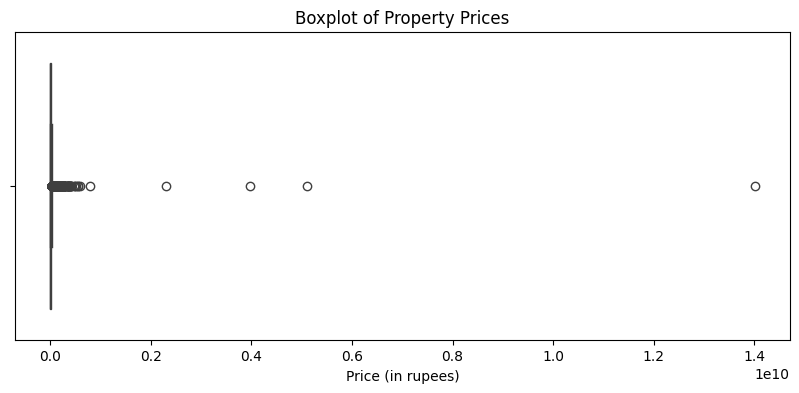

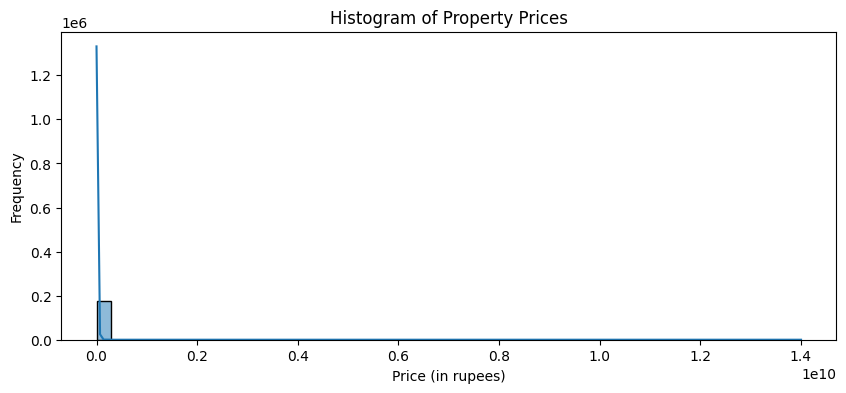

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_HP['Amount(in rupees)'])
plt.title('Boxplot of Property Prices')
plt.xlabel('Price (in rupees)')
plt.show()

# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(df_HP['Amount(in rupees)'], bins=50, kde=True)
plt.title('Histogram of Property Prices')
plt.xlabel('Price (in rupees)')
plt.ylabel('Frequency')
plt.show()


- so we will use median

In [ ]:
df_HP['Amount(in rupees)'].fillna(df_HP['Amount(in rupees)'].median(), inplace = True)

<ipython-input-24-9657da2b022e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Amount(in rupees)'].fillna(df_HP['Amount(in rupees)'].median(), inplace = True)


In [ ]:
df_HP.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


## processing Carpet Area column

In [ ]:
df_HP['Carpet Area'].value_counts()

,count
Carpet Area,
1000 sqft,5285
900 sqft,4649
1300 sqft,3457
1600 sqft,2752
600 sqft,2225
...,...
135 sqft,1
2448 sqft,1
1524 sqft,1


In [ ]:
other_units = df_HP['Carpet Area'].str.extract(r'(\D+)')[0].unique()
other_units

array([' sqft', nan, ' sqm', ' sqyrd', ' acre', ' ground', ' cent',
       ' bigha', ' marla', ' kanal'], dtype=object)

It turns out there are not only sqft units, but there are others as well, and quite a few of them

- let's to transform other units to sqft

In [ ]:
def transform_area(area):
  if pd.notna(area):
    value, unit = area.split()
    value = float(value)
    if unit == 'sqft':
      return value
    elif unit == 'syqrd':
      return value * 9
    elif unit == 'sqm':
      return value * 10.7
    elif unit == 'marla':
      return value * 272.2
    elif unit == 'acre':
      return value * 43560
    elif unit == 'kanal':
      return value * 4554
    elif unit == 'ground':
      return value * 2400
    elif unit == 'cent':
      return value * 435.5
    elif unit == 'bigha':
      return value * 27000
    elif unit == 'aankadam':
      return value * 72
  return None

In [ ]:
df_HP['Carpet Area Sqft'] = df_HP['Carpet Area'].apply(transform_area)
df_HP = df_HP.drop(['Carpet Area'],axis = 1)

df_HP['Carpet Area Sqft'].value_counts()

,count
Carpet Area Sqft,
1000.0,5285
900.0,4649
1300.0,3457
1600.0,2752
600.0,2225
...,...
1912.0,1
2681.0,1
3083.0,1


### we should deside what we will use to fill Nan values mean or median

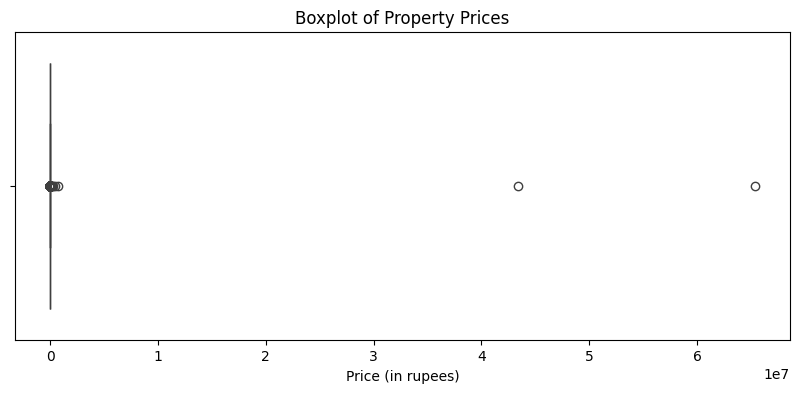

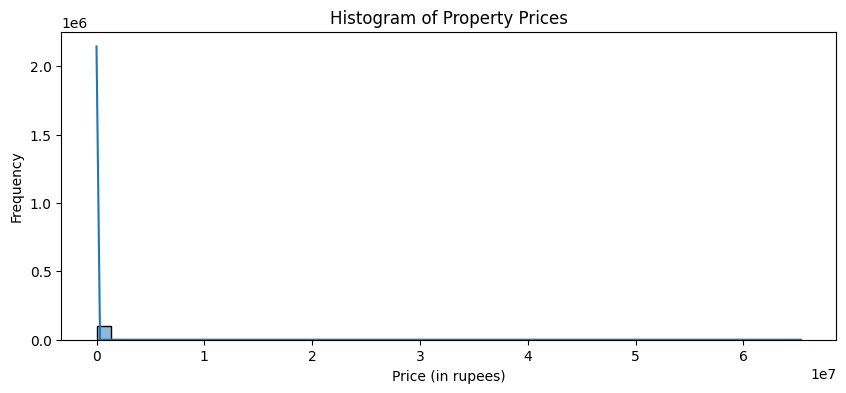

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_HP['Carpet Area Sqft'])
plt.title('Boxplot of Property Prices')
plt.xlabel('Price (in rupees)')
plt.show()

# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(df_HP['Carpet Area Sqft'], bins=50, kde=True)
plt.title('Histogram of Property Prices')
plt.xlabel('Price (in rupees)')
plt.ylabel('Frequency')
plt.show()


- so we will use median

In [ ]:
df_HP['Carpet Area Sqft'].fillna(df_HP['Carpet Area Sqft'].median(), inplace = True)

<ipython-input-31-36b47eae18f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Carpet Area Sqft'].fillna(df_HP['Carpet Area Sqft'].median(), inplace = True)


In [ ]:
df_HP.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Status,615
Floor,7077
Transaction,83
Furnishing,2897


## processing Floor column

In [ ]:
df_HP['Floor'] = df['Floor'].fillna(' out of ')

set -111 to nan values to put it to set it laterly mean or mod before separate

In [ ]:
df_HP['Floor'].value_counts()

,count
Floor,
2 out of 4,12433
1 out of 4,11985
3 out of 4,8792
1 out of 3,7093
out of,7077
...,...
15 out of 33,1
32 out of 33,1
Lower Basement out of 23,1


In [ ]:
df_HP['Floor'] = df_HP['Floor'].str.replace('Ground', '0')
df_HP['Floor'] = df_HP['Floor'].str.replace('Lower Basement', '-2')
df_HP['Floor'] = df_HP['Floor'].str.replace('Upper Basement', '-1')


In [ ]:
df_HP[['Floor Location', 'Total Floors']] = df_HP['Floor'].str.split(' out of ', expand=True)
df_HP = df_HP.drop(columns= ['Floor'])
df_HP['Floor Location'] = pd.to_numeric(df_HP['Floor Location'], errors='coerce')
df_HP['Total Floors'] = pd.to_numeric(df_HP['Total Floors'], errors='coerce')

In [ ]:
df_HP.dtypes

,0
Index,int64
Title,object
Description,object
Amount(in rupees),float64
Price (in rupees),float64
location,object
Status,object
Transaction,object
Furnishing,object
facing,object


- convert 'floor location' and 'total floors' to int

In [ ]:
df_HP['Floor Location'].value_counts()

,count
Floor Location,
2.0,33545
1.0,31522
3.0,26829
4.0,17873
5.0,12677
0.0,12354
6.0,6964
7.0,6722
8.0,5429


In [ ]:
df_HP['Floor Location'].fillna(df_HP['Floor Location'].median(), inplace = True)

<ipython-input-39-a239367d9f09>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Floor Location'].fillna(df_HP['Floor Location'].median(), inplace = True)


In [ ]:
df_HP['Total Floors'].value_counts()

,count
Total Floors,
4.0,43885
5.0,20273
3.0,19325
10.0,13189
6.0,8980
...,...
72.0,2
84.0,1
150.0,1


In [ ]:
df_HP['Total Floors'].fillna(df_HP['Total Floors'].median(), inplace = True)

<ipython-input-41-50fe2c95b862>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Total Floors'].fillna(df_HP['Total Floors'].median(), inplace = True)


In [ ]:
df_HP.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Status,615
Transaction,83
Furnishing,2897
facing,70233


## processing transaaction column

In [ ]:
df_HP.Transaction.value_counts()

,count
Transaction,
Resale,144172
New Property,42565
Other,709
Rent/Lease,2


- most of values is Resale

In [ ]:
df_HP['Transaction'].fillna('Resale' , inplace = True)

<ipython-input-44-768aa3949d0f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Transaction'].fillna('Resale' , inplace = True)


In [ ]:
df_HP.Transaction.value_counts()

,count
Transaction,
Resale,144255
New Property,42565
Other,709
Rent/Lease,2


## processing Furnishing column

In [ ]:
df_HP.Furnishing.value_counts()

,count
Furnishing,
Semi-Furnished,88318
Unfurnished,76154
Furnished,20162


- most of values is Resale

In [ ]:
df_HP['Furnishing'].fillna('Semi-Furnished' , inplace = True)

<ipython-input-47-204ece0718bd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Furnishing'].fillna('Semi-Furnished' , inplace = True)


In [ ]:
df_HP.Furnishing.value_counts()

,count
Furnishing,
Semi-Furnished,91215
Unfurnished,76154
Furnished,20162


## processing overlooking column

In [ ]:
df_HP.overlooking.value_counts()

,count
overlooking,
Main Road,32193
"Garden/Park, Main Road",27238
Garden/Park,23077
"Garden/Park, Pool, Main Road",12413
"Pool, Garden/Park, Main Road",3615
"Garden/Park, Pool",2880
"Main Road, Garden/Park, Pool",1359
"Pool, Main Road",1136
Pool,1012


You will notice that we can extract from this column three columns, each of which expresses the presence of a main road, a garden, or a pool.

In [ ]:
df_HP['overlooking'] = df_HP['overlooking'].fillna('')

In [ ]:
df_HP['Main Road'] = df_HP['overlooking'].apply(lambda x: 1 if 'Main Road' in str(x) else 0)


In [ ]:
df_HP['Garden/Park'] = df_HP['overlooking'].apply(lambda x: 1 if 'Garden/Park' in str(x) else 0)


In [ ]:
df_HP['Pool'] = df_HP['overlooking'].apply(lambda x: 1 if 'Pool' in str(x) else 0)


In [ ]:
df_HP = df_HP.drop(columns = ['overlooking'])

In [ ]:
df_HP.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Status,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Carpet Area Sqft,Floor Location,Total Floors,Main Road,Garden/Park,Pool
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.0,thane,Ready to Move,Resale,Unfurnished,NaN,1,2,NaN,500.0,10.0,11.0,0,0,0
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.0,thane,Ready to Move,Resale,Semi-Furnished,East,2,NaN,Freehold,473.0,3.0,22.0,0,1,0
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.0,thane,Ready to Move,Resale,Unfurnished,East,2,NaN,Freehold,779.0,10.0,29.0,0,1,0
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,NaN,thane,Ready to Move,Resale,Unfurnished,NaN,1,1,NaN,530.0,1.0,3.0,0,0,0
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.0,thane,Ready to Move,Resale,Unfurnished,West,2,NaN,Co-operative Society,635.0,20.0,42.0,1,1,0


## processing Bathroom column

In [ ]:
df_HP['Bathroom'].value_counts()

,count
Bathroom,
2,93007
3,55781
1,18654
4,15600
5,3343
6,209
7,35
> 10,35
10,14


In [ ]:
df_HP['Bathroom'] = df_HP['Bathroom'].replace('> 10', '11')

In [ ]:
df_HP['Bathroom'] = df_HP['Bathroom'].astype(float)
df_HP['Bathroom'].fillna(df_HP['Bathroom'].median(), inplace = True)
df_HP['Bathroom'] = df_HP['Bathroom'].astype(int)

<ipython-input-58-6c5274d15e4a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Bathroom'].fillna(df_HP['Bathroom'].median(), inplace = True)


In [ ]:
df_HP.dtypes

,0
Index,int64
Title,object
Description,object
Amount(in rupees),float64
Price (in rupees),float64
location,object
Status,object
Transaction,object
Furnishing,object
facing,object


## processing Balcony Column

In [ ]:
df['Balcony'].value_counts()

,count
Balcony,
2,51809
1,49219
3,27111
4,9420
5,841
6,132
> 10,22
7,14
10,13


In [ ]:
df_HP['Balcony'] = df_HP['Balcony'].replace('> 10', '11')

In [ ]:
df_HP['Balcony'] = df_HP['Balcony'].astype(float)
df_HP['Balcony'].fillna(df_HP['Balcony'].median(), inplace = True)
df_HP['Balcony'] = df_HP['Balcony'].astype(int)

<ipython-input-62-41cc0094531b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Balcony'].fillna(df_HP['Balcony'].median(), inplace = True)


In [ ]:
df_HP.dtypes

,0
Index,int64
Title,object
Description,object
Amount(in rupees),float64
Price (in rupees),float64
location,object
Status,object
Transaction,object
Furnishing,object
facing,object


In [ ]:
df_HP.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Status,615
Transaction,0
Furnishing,0
facing,70233


## processing Ownership column

In [ ]:
df_HP['Ownership'].value_counts()

,count
Ownership,
Freehold,112229
Leasehold,5285
Co-operative Society,3431
Power Of Attorney,1069


In [ ]:
df_HP['Ownership'].fillna('Freehold', inplace = True)

<ipython-input-66-e0a4d5b1d16c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Ownership'].fillna('Freehold', inplace = True)


In [ ]:
df_HP['Ownership'].value_counts()

,count
Ownership,
Freehold,177746
Leasehold,5285
Co-operative Society,3431
Power Of Attorney,1069


In [ ]:
df_HP.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Status,615
Transaction,0
Furnishing,0
facing,70233


In [ ]:
df_HP['facing'].value_counts()

,count
facing,
East,54741
North - East,24220
North,16533
West,8574
South,4694
North - West,3843
South - East,2622
South -West,2071


In [ ]:
df_HP['facing'].fillna('East', inplace = True)

<ipython-input-70-79f30c46fadd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['facing'].fillna('East', inplace = True)


In [ ]:
df_HP['facing'].value_counts()

,count
facing,
East,124974
North - East,24220
North,16533
West,8574
South,4694
North - West,3843
South - East,2622
South -West,2071


In [ ]:
df_HP.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),17665
location,0
Status,615
Transaction,0
Furnishing,0
facing,0


In [ ]:
df_HP.duplicated().sum()

np.int64(0)

## processing price column

In [ ]:
df_HP['Price (in rupees)'].value_counts()

,count
Price (in rupees),
4000.0,2463
5000.0,2286
10000.0,2273
3200.0,1479
18000.0,1420
...,...
10149.0,1
7131.0,1
4006.0,1


### we should deside what we will use to fill Nan values mean or median

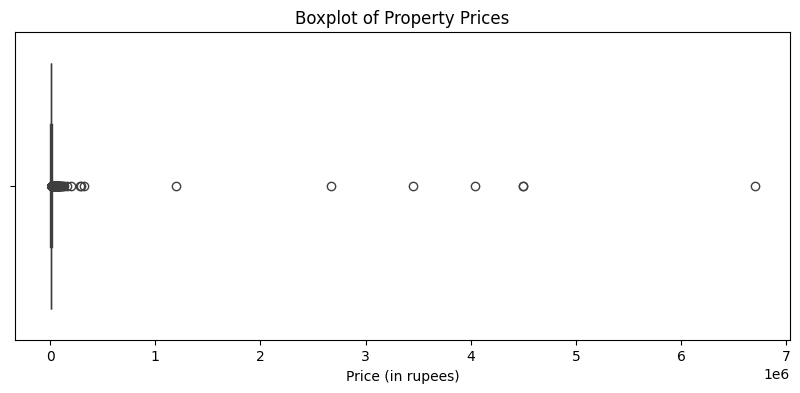

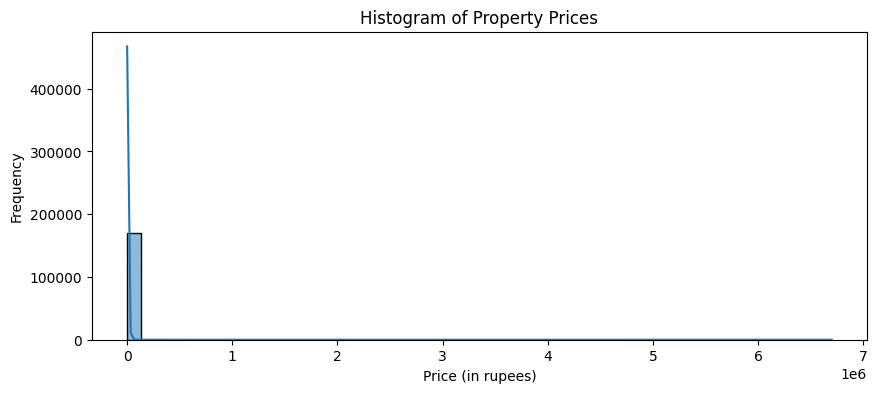

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_HP['Price (in rupees)'])
plt.title('Boxplot of Property Prices')
plt.xlabel('Price (in rupees)')
plt.show()

# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(df_HP['Price (in rupees)'], bins=50, kde=True)
plt.title('Histogram of Property Prices')
plt.xlabel('Price (in rupees)')
plt.ylabel('Frequency')
plt.show()


- so we will use median

In [ ]:
df_HP['Price (in rupees)'].fillna(df_HP['Price (in rupees)'].median(), inplace = True)

<ipython-input-76-bf9c9b152ee3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_HP['Price (in rupees)'].fillna(df_HP['Price (in rupees)'].median(), inplace = True)


In [ ]:
df_HP.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),0
Price (in rupees),0
location,0
Status,615
Transaction,0
Furnishing,0
facing,0


## processing Status column

In [ ]:
df_HP['Status'].value_counts()

,count
Status,
Ready to Move,186916


In [ ]:
df_HP.drop(columns = ['Status' , 'Description'] , inplace = True)

In [ ]:
df_HP.isnull().sum()

,0
Index,0
Title,0
Amount(in rupees),0
Price (in rupees),0
location,0
Transaction,0
Furnishing,0
facing,0
Bathroom,0
Balcony,0


In [ ]:
df_HP.head()

,Index,Title,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Carpet Area Sqft,Floor Location,Total Floors,Main Road,Garden/Park,Pool
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,4200000.0,6000.0,thane,Resale,Unfurnished,East,1,2,Freehold,500.0,10.0,11.0,0,0,0
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,9800000.0,13799.0,thane,Resale,Semi-Furnished,East,2,2,Freehold,473.0,3.0,22.0,0,1,0
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,14000000.0,17500.0,thane,Resale,Unfurnished,East,2,2,Freehold,779.0,10.0,29.0,0,1,0
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,2500000.0,6034.0,thane,Resale,Unfurnished,East,1,1,Freehold,530.0,1.0,3.0,0,0,0
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,16000000.0,18824.0,thane,Resale,Unfurnished,West,2,2,Co-operative Society,635.0,20.0,42.0,1,1,0


# UNIVARIATE ANALYSIS

-	For numeric columns:
  -	Distribution plots (e.g. histograms, KDE)
  - Boxplots for outliers
-	For categorical columns:
  - Value counts
  - Bar plots


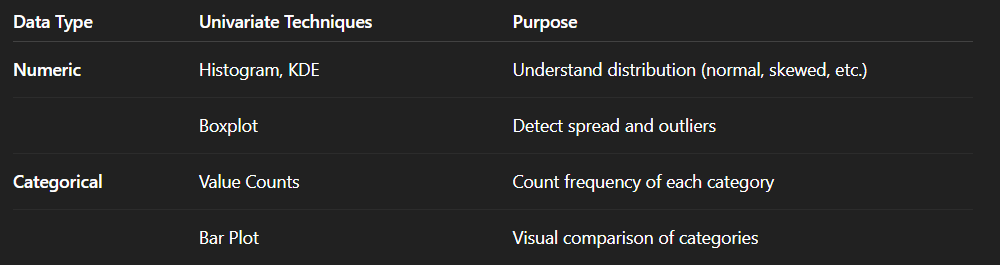

## BOXPLOT

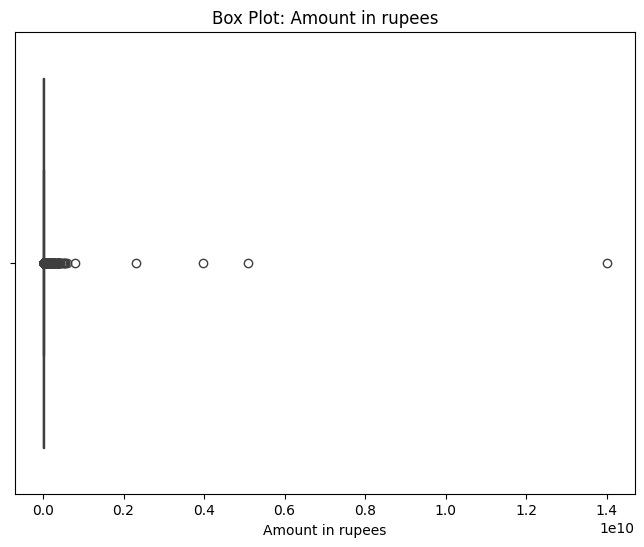

In [ ]:
# Box Plot for 'Amount in rupees'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount(in rupees)', data=df_HP)
plt.title("Box Plot: Amount in rupees")
plt.xlabel("Amount in rupees")
plt.show()

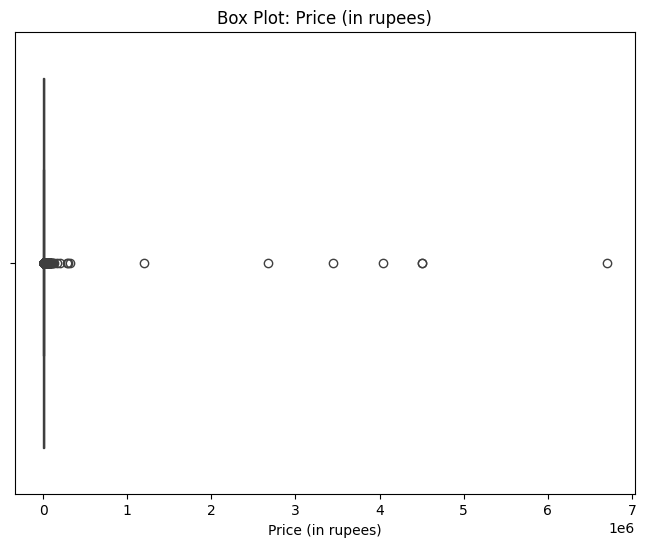

In [ ]:
# Box Plot for 'Price (in rupees)'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price (in rupees)', data=df_HP)
plt.title("Box Plot: Price (in rupees)")
plt.xlabel("Price (in rupees)")
plt.show()

## HISTOGRAM

In [ ]:
df_HP.dtypes

,0
Index,int64
Title,object
Amount(in rupees),float64
Price (in rupees),float64
location,object
Transaction,object
Furnishing,object
facing,object
Bathroom,int64
Balcony,int64


Summary statistics for column Amount(in rupees)
count    1.875310e+05
mean     1.176542e+07
std      3.841763e+07
min      1.000000e+05
25%      5.000000e+06
50%      7.800000e+06
75%      1.360000e+07
max      1.400300e+10
Name: Amount(in rupees), dtype: float64


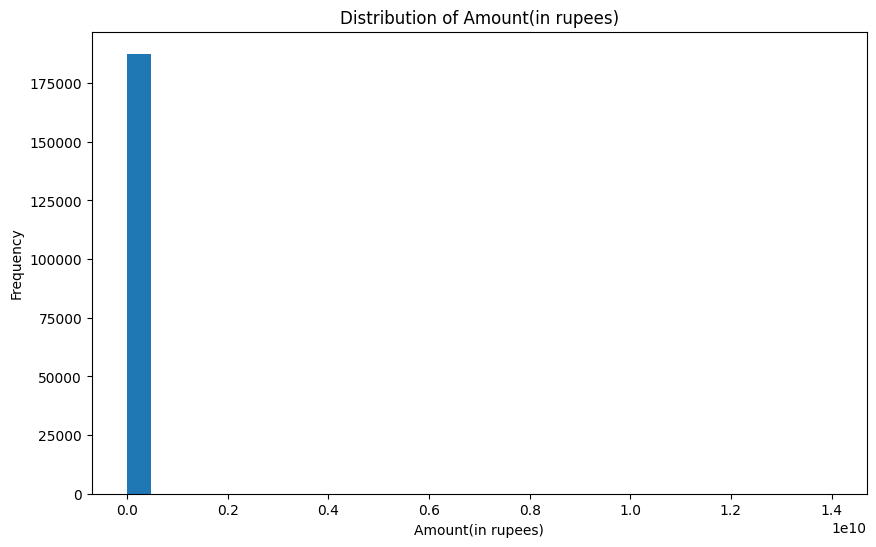

Summary statistics for column Price (in rupees)
count    1.875310e+05
mean     7.437787e+03
std      2.593087e+04
min      0.000000e+00
25%      4.501500e+03
50%      6.034000e+03
75%      8.452500e+03
max      6.700000e+06
Name: Price (in rupees), dtype: float64


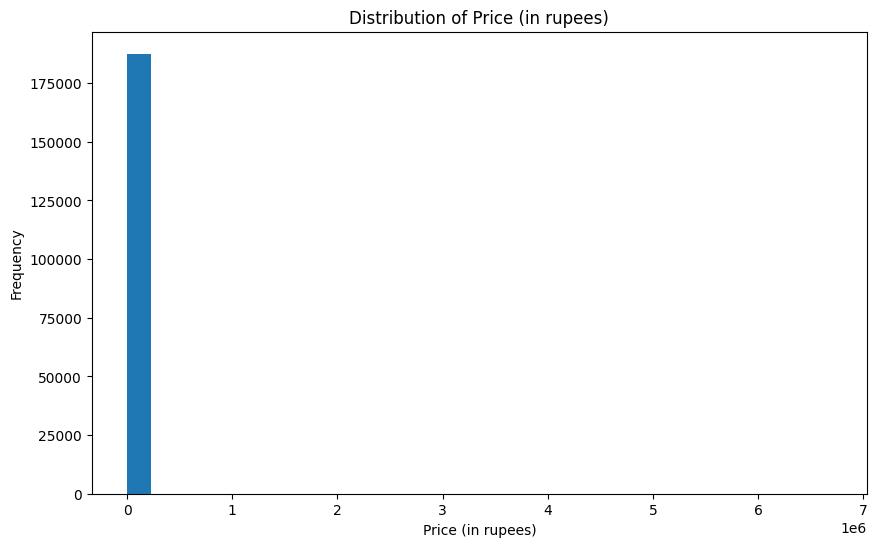

Summary statistics for column Carpet Area Sqft
count    1.875310e+05
mean     1.756356e+03
std      1.811316e+05
min      1.000000e+00
25%      1.000000e+03
50%      1.068000e+03
75%      1.140000e+03
max      6.534000e+07
Name: Carpet Area Sqft, dtype: float64


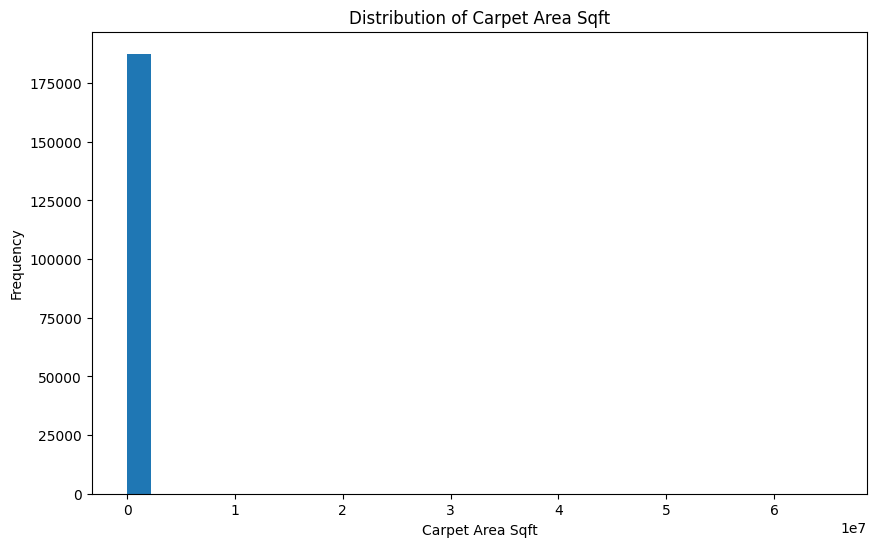

Summary statistics for column Bathroom
count    187531.000000
mean          2.426356
std           0.869645
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          11.000000
Name: Bathroom, dtype: float64


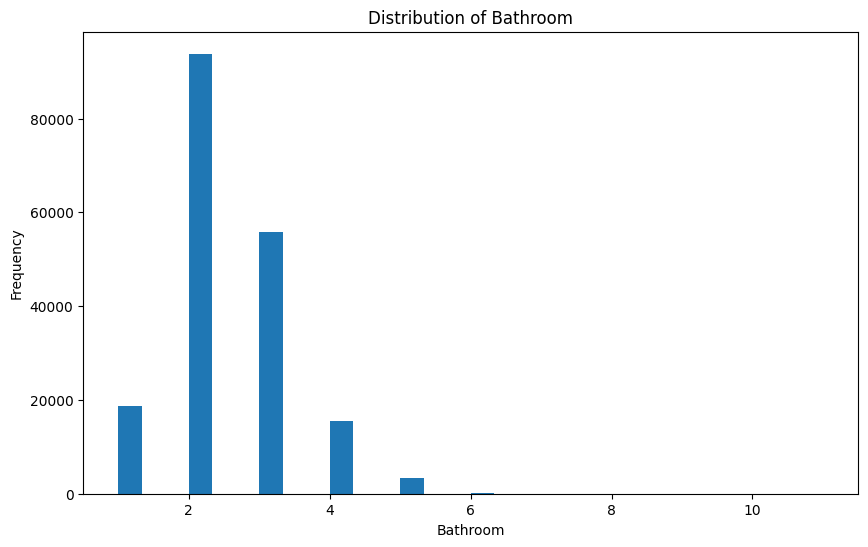

Summary statistics for column Balcony
count    187531.000000
mean          2.001317
std           0.823651
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          11.000000
Name: Balcony, dtype: float64


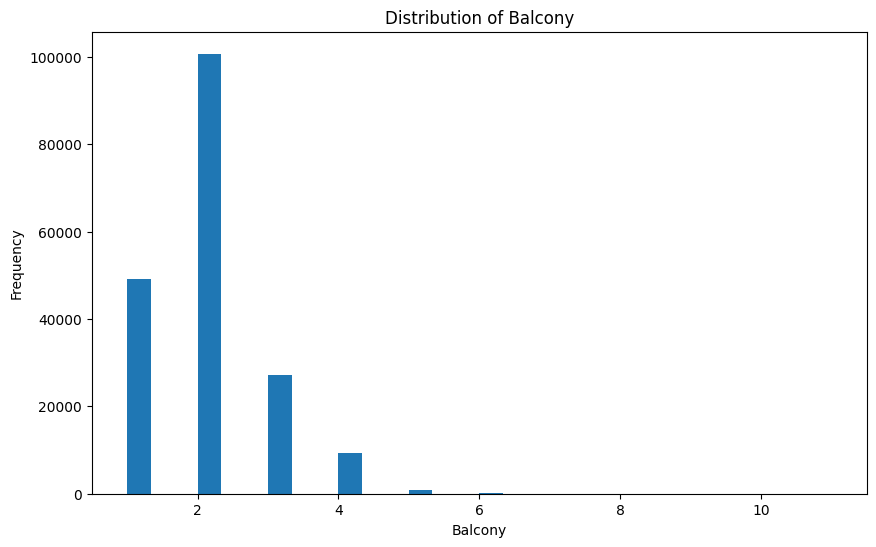

Summary statistics for column Floor Location
count    187531.000000
mean          4.387525
std           4.583752
min          -2.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         200.000000
Name: Floor Location, dtype: float64


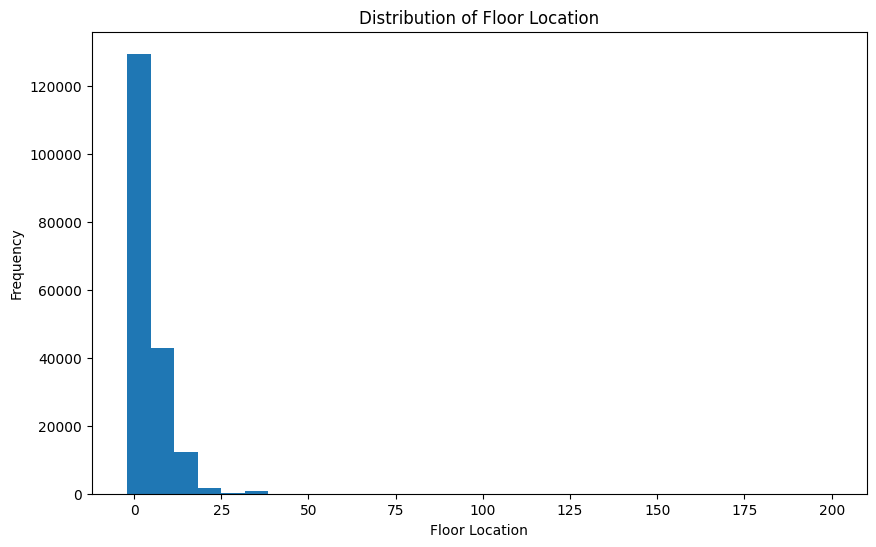

Summary statistics for column Total Floors
count    187531.000000
mean          8.630653
std           7.500838
min           1.000000
25%           4.000000
50%           5.000000
75%          11.000000
max         200.000000
Name: Total Floors, dtype: float64


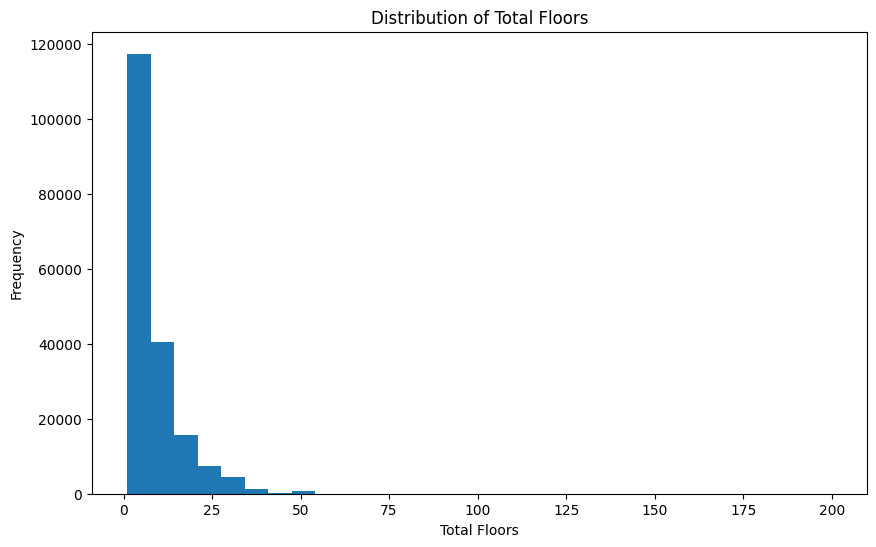

In [ ]:
# Univariate analysis for numeric variables
numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Carpet Area Sqft', 'Bathroom', 'Balcony', 'Floor Location', 'Total Floors']
for column in numeric_columns:
    print("Summary statistics for column", column)
    print(df_HP[column].describe())
    plt.figure(figsize=(10, 6))
    plt.hist(df_HP[column], bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Bar Plot

In [ ]:
df_HP.columns

Index(['Index', 'Title', 'Amount(in rupees)', 'Price (in rupees)', 'location',
       'Transaction', 'Furnishing', 'facing', 'Bathroom', 'Balcony',
       'Ownership', 'Carpet Area Sqft', 'Floor Location', 'Total Floors',
       'Main Road', 'Garden/Park', 'Pool'],
      dtype='object')

Unique values in column Transaction
Transaction
Resale          144255
New Property     42565
Other              709
Rent/Lease           2
Name: count, dtype: int64


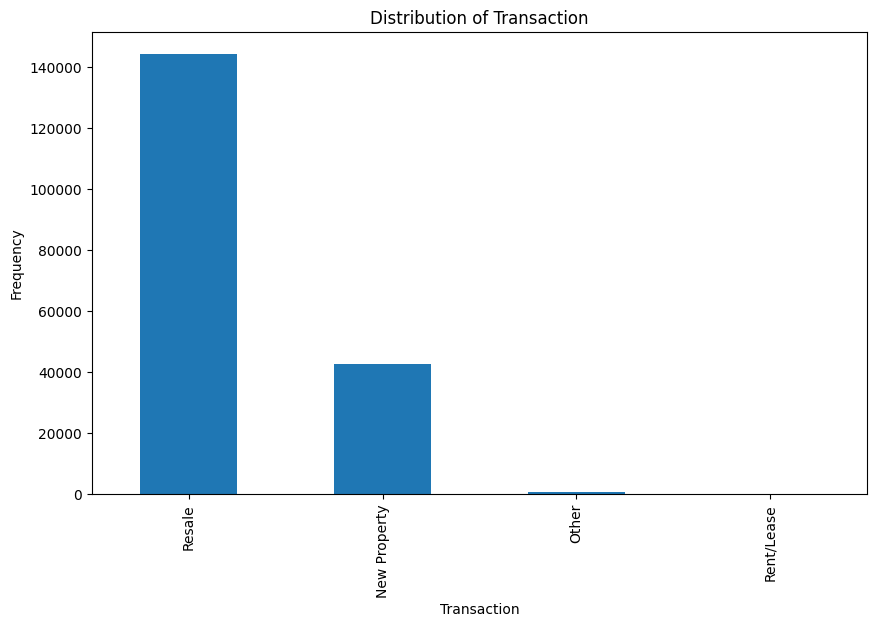

Unique values in column Furnishing
Furnishing
Semi-Furnished    91215
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64


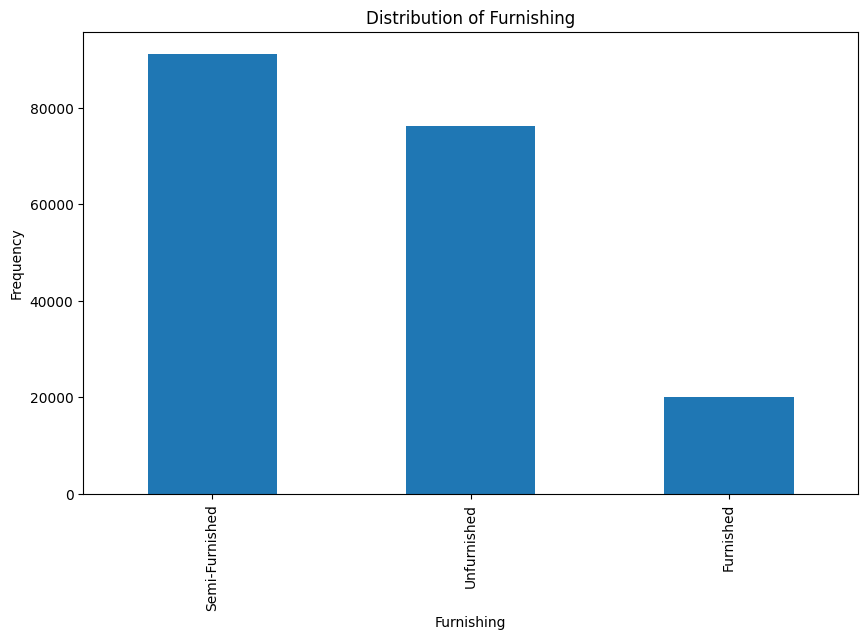

Unique values in column facing
facing
East            124974
North - East     24220
North            16533
West              8574
South             4694
North - West      3843
South - East      2622
South -West       2071
Name: count, dtype: int64


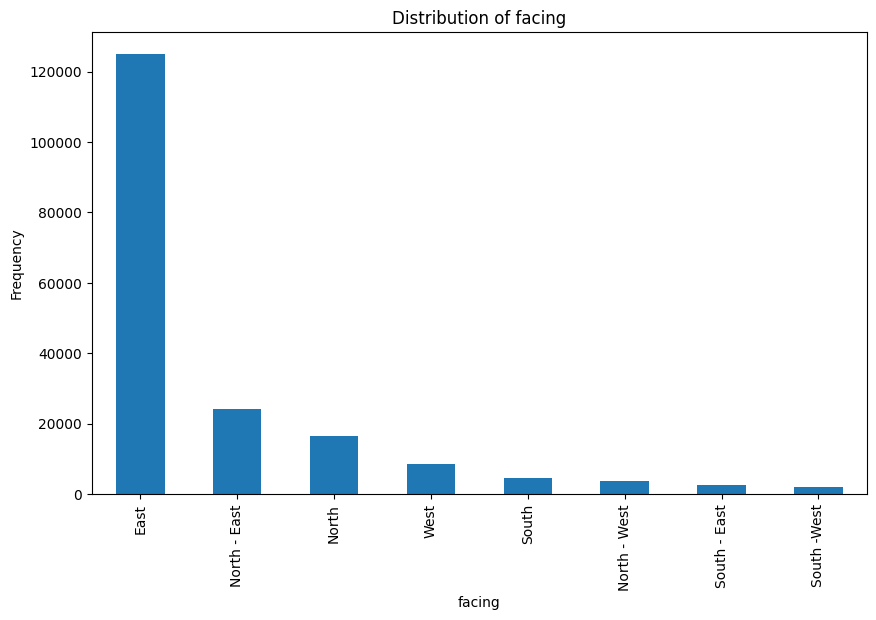

Unique values in column Ownership
Ownership
Freehold                177746
Leasehold                 5285
Co-operative Society      3431
Power Of Attorney         1069
Name: count, dtype: int64


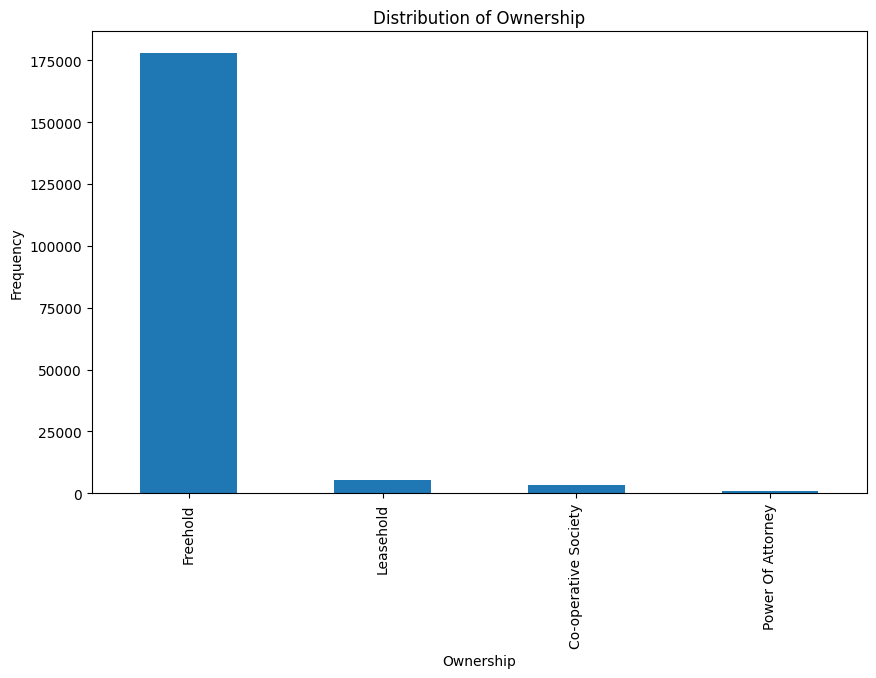

Unique values in column Main Road
Main Road
0    108841
1     78690
Name: count, dtype: int64


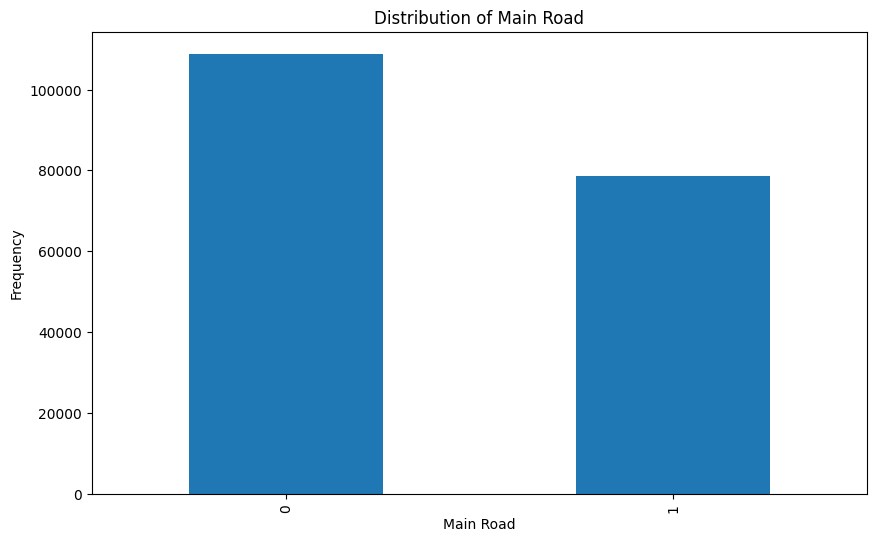

Unique values in column Garden/Park
Garden/Park
0    115793
1     71738
Name: count, dtype: int64


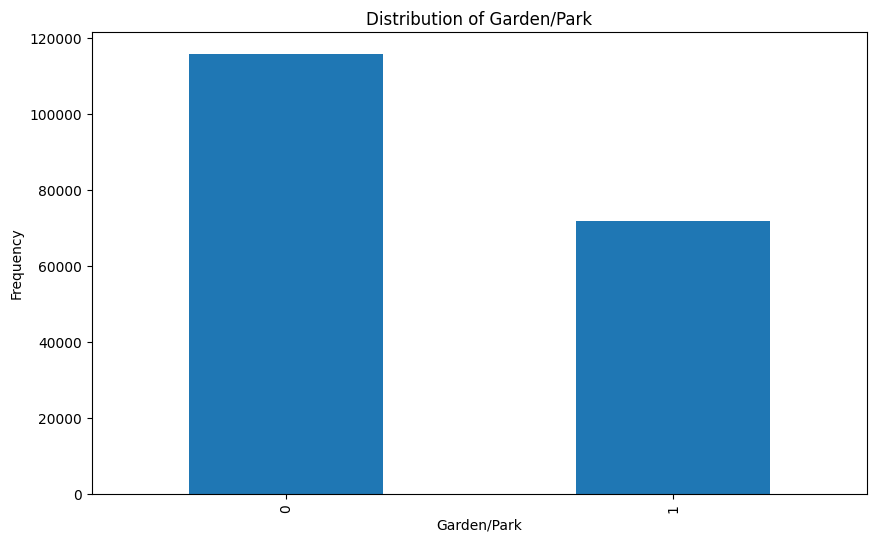

Unique values in column Pool
Pool
0    164615
1     22916
Name: count, dtype: int64


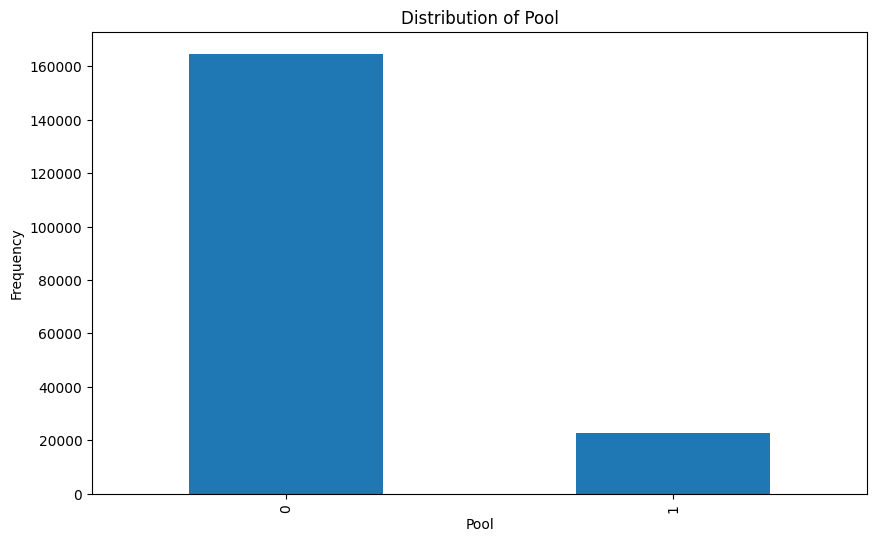

In [ ]:
# Univariate analysis for categorical variables
categorical_columns = ['Transaction', 'Furnishing', 'facing', 'Ownership', 'Main Road', 'Garden/Park', 'Pool']
for column in categorical_columns:
    print("Unique values in column", column)
    print(df_HP[column].value_counts())
    plt.figure(figsize=(10, 6))
    df_HP[column].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# BIVARIATE ANALYSIS

## SCATTER PLOT

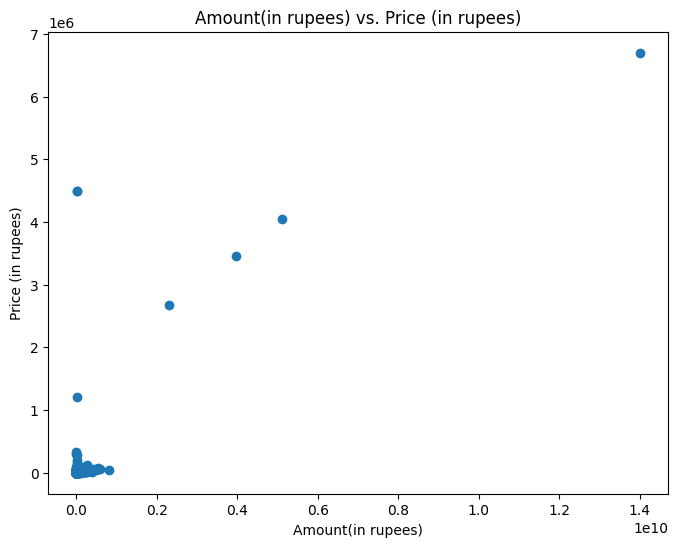

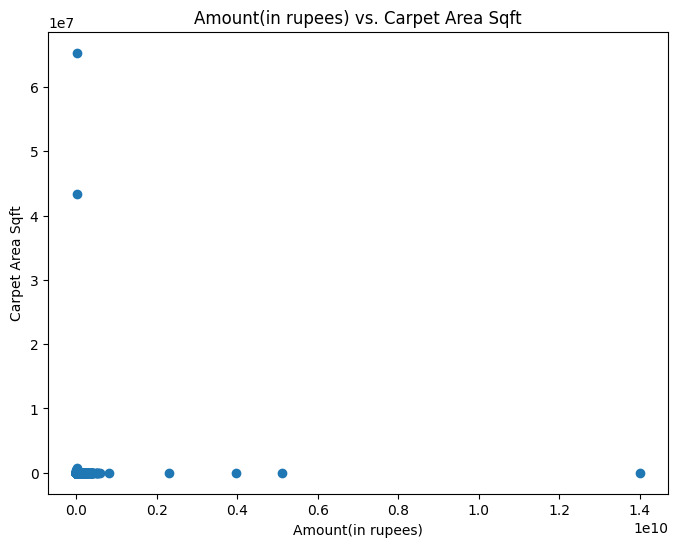

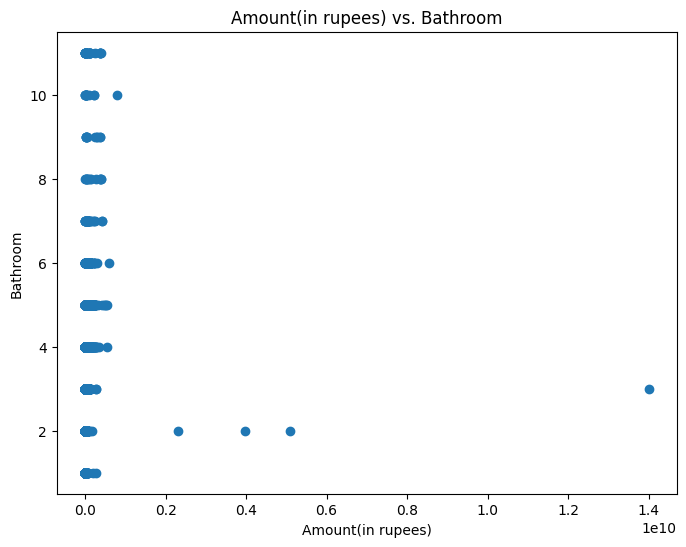

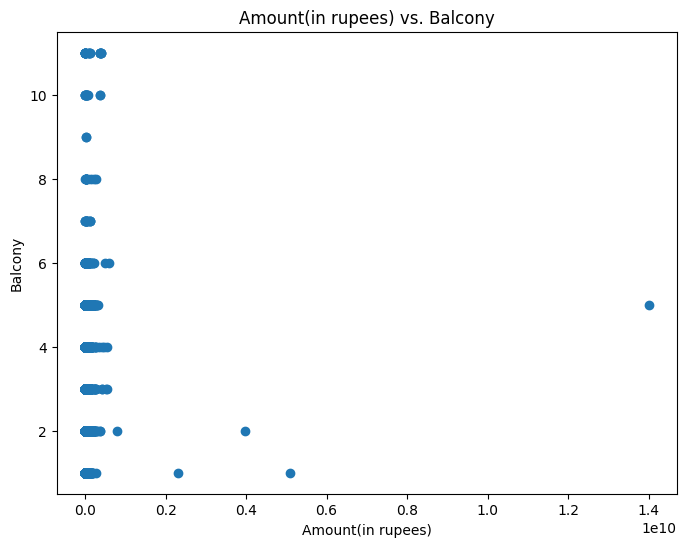

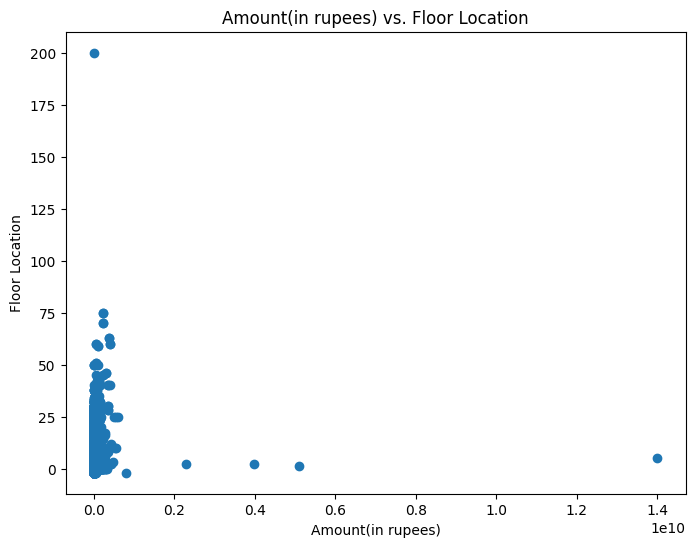

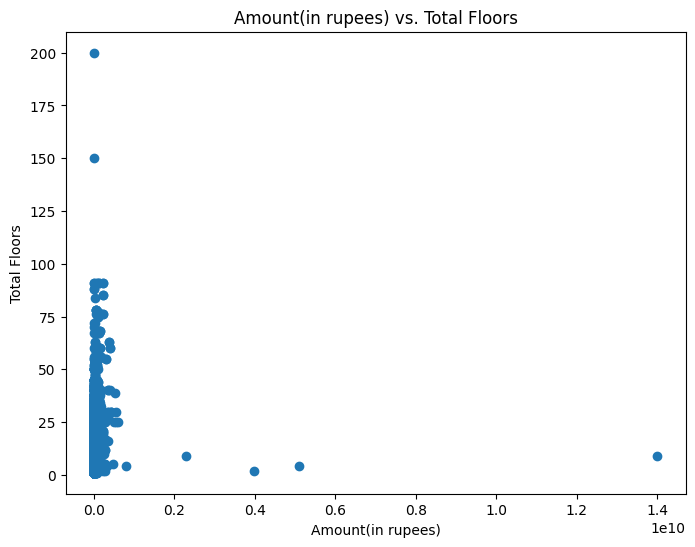

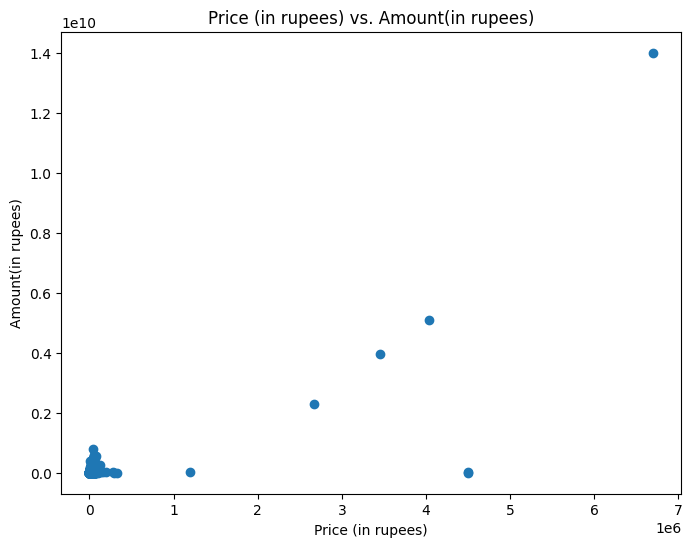

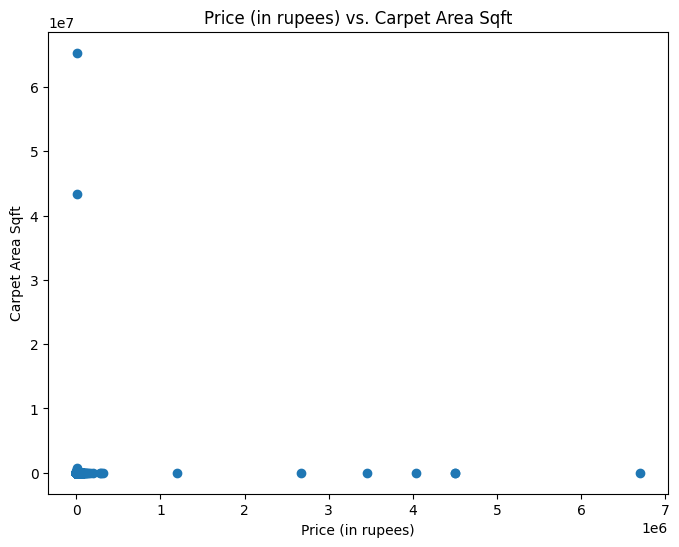

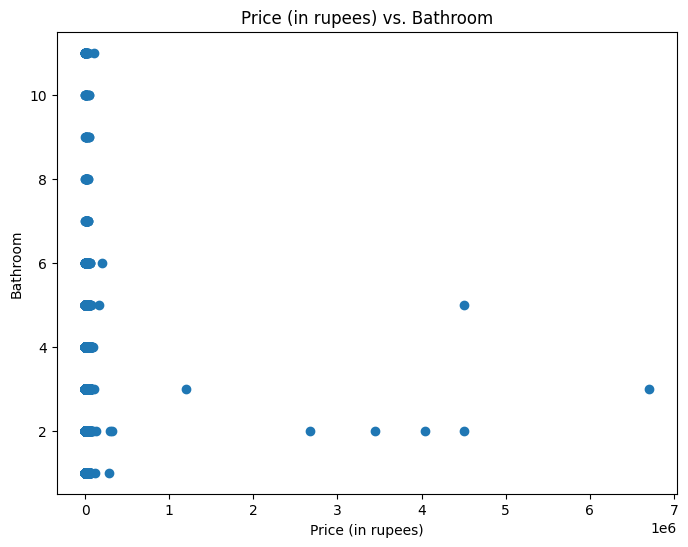

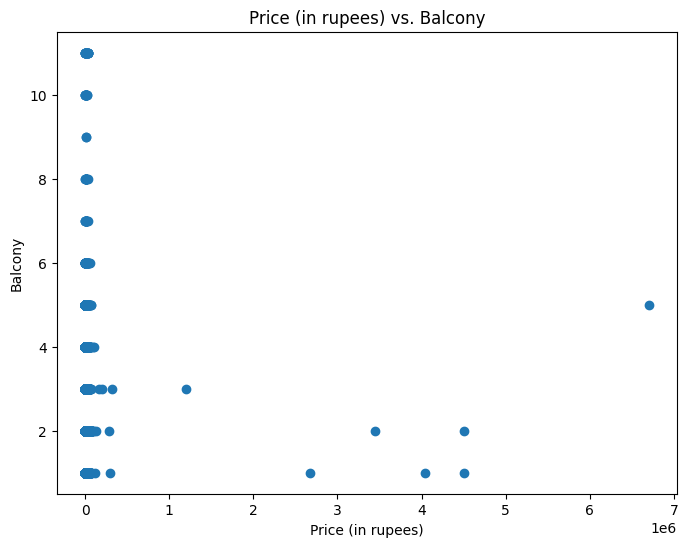

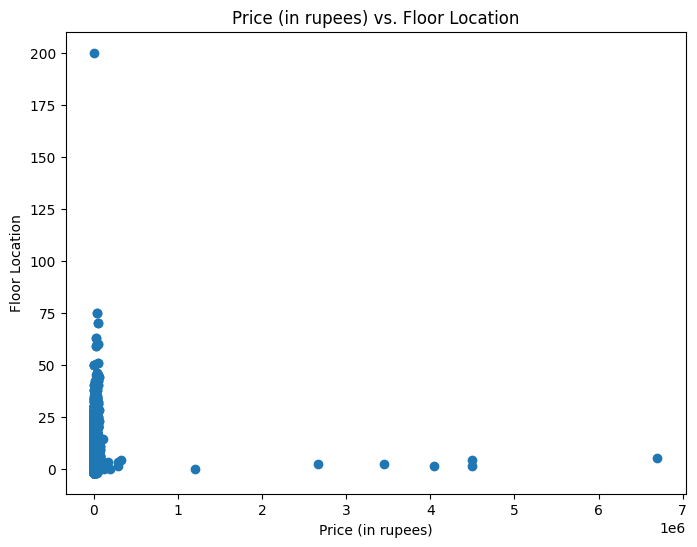

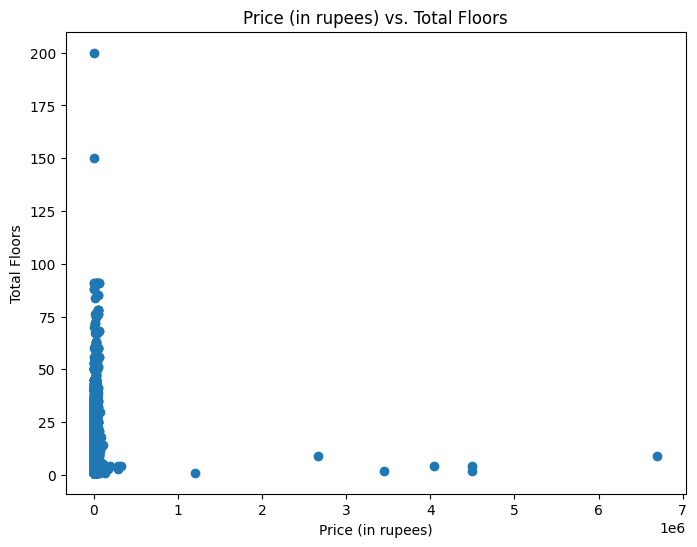

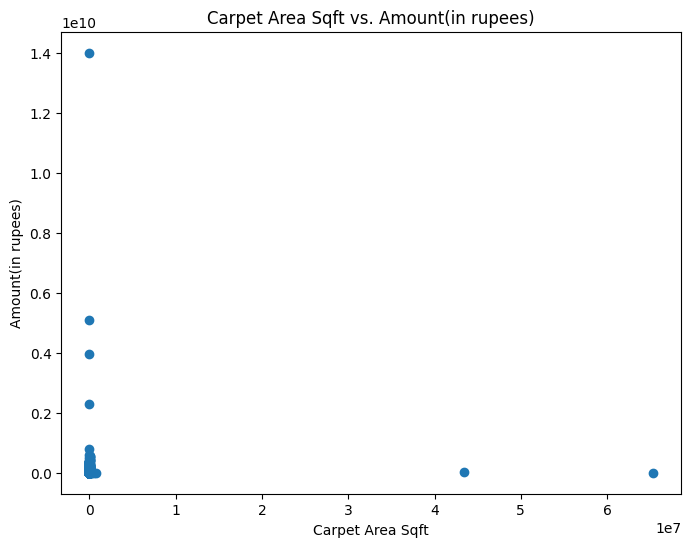

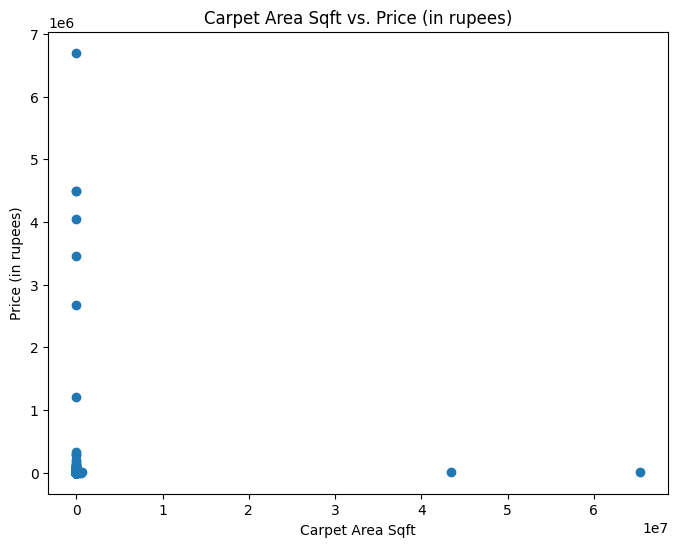

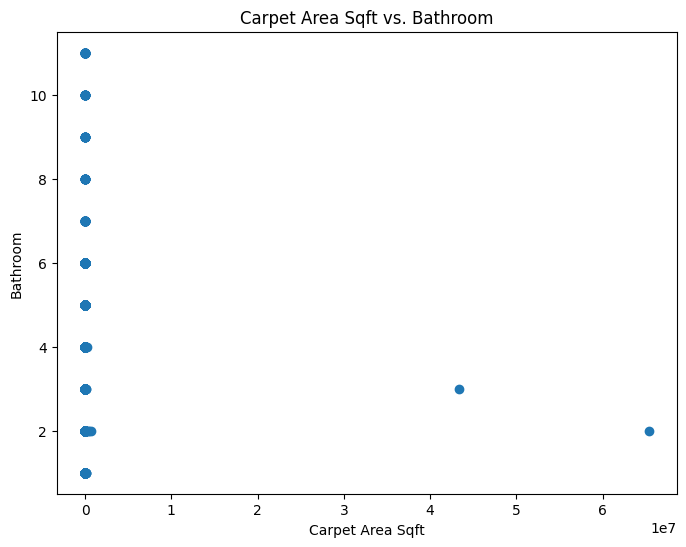

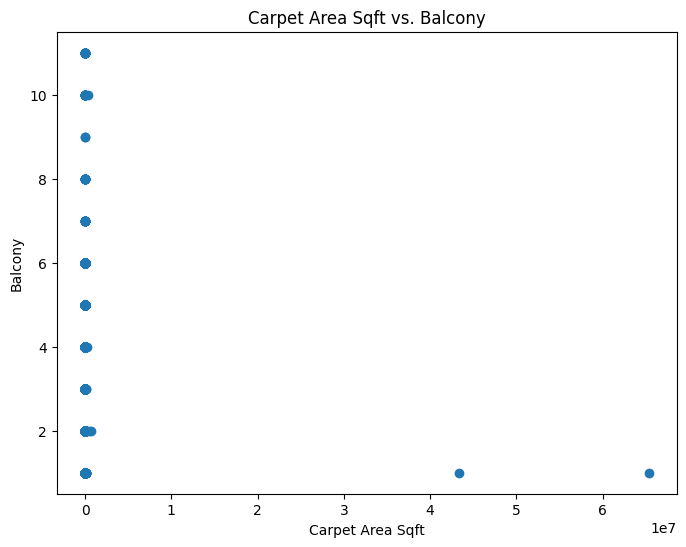

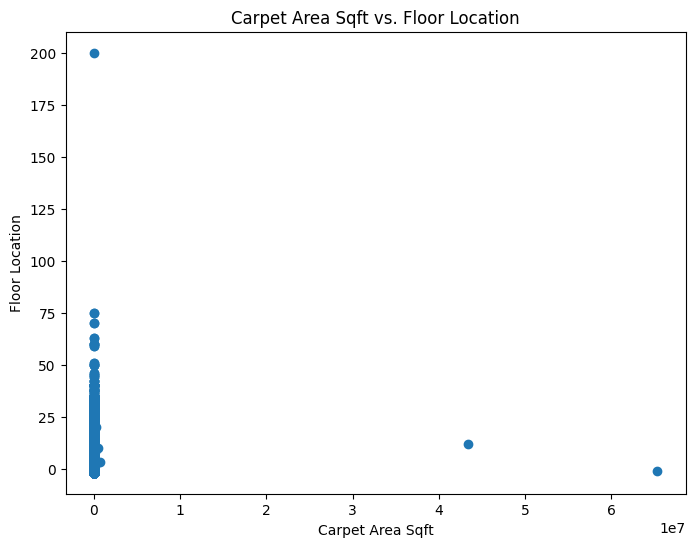

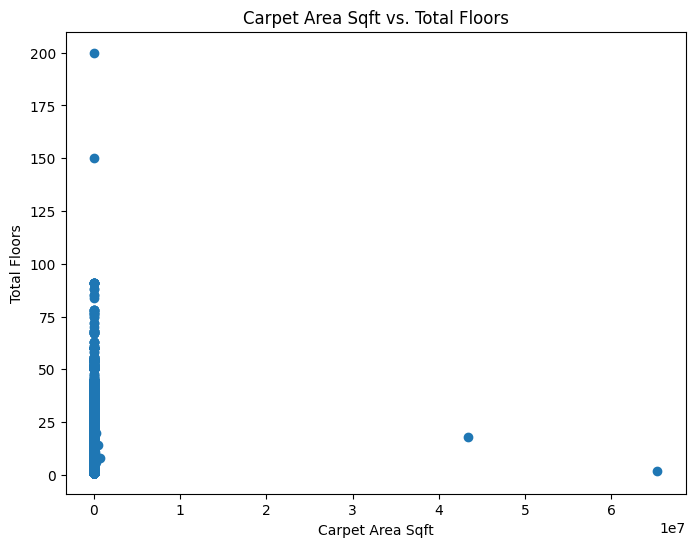

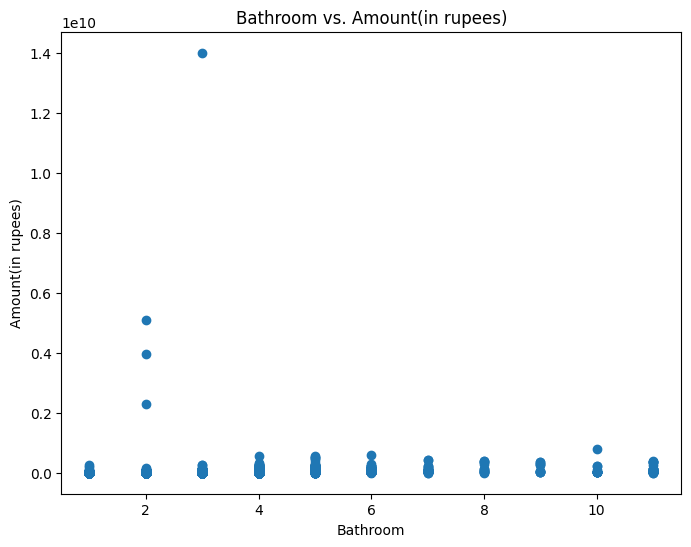

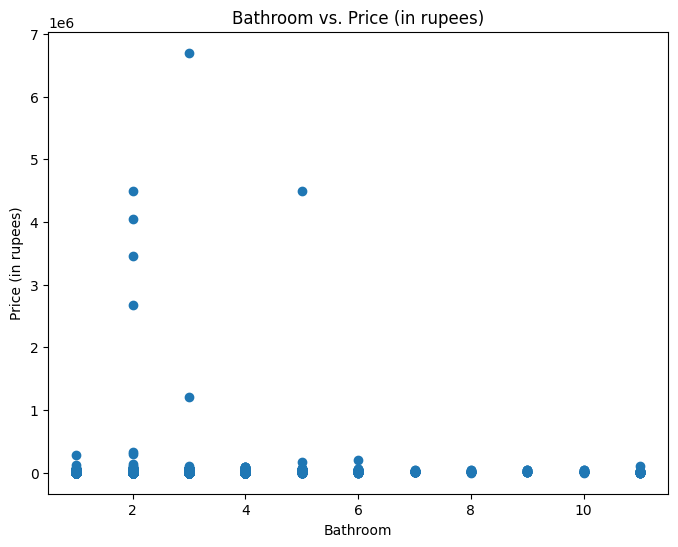

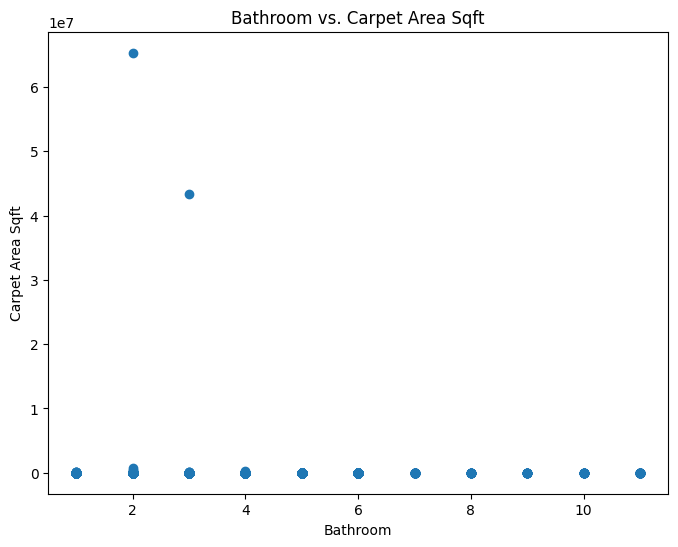

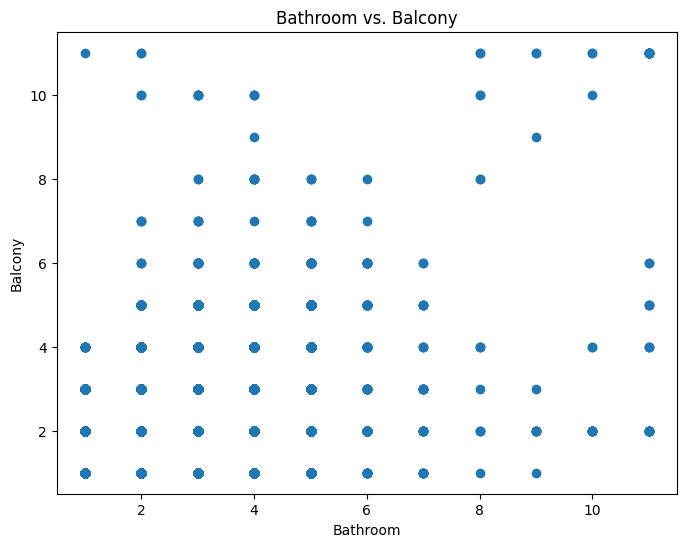

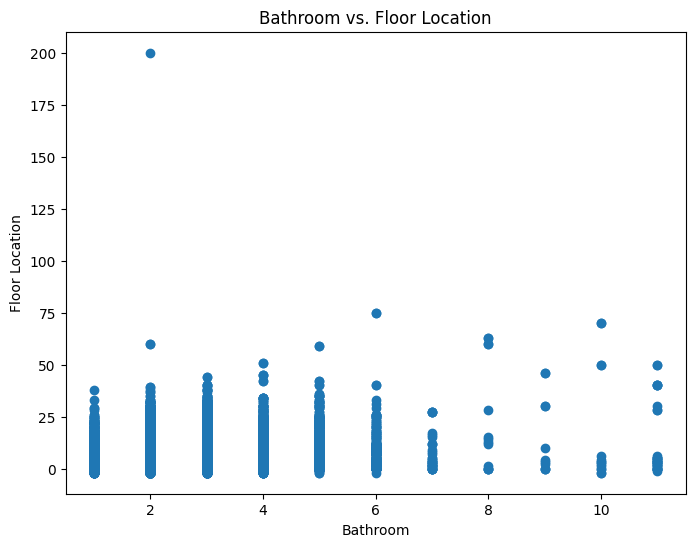

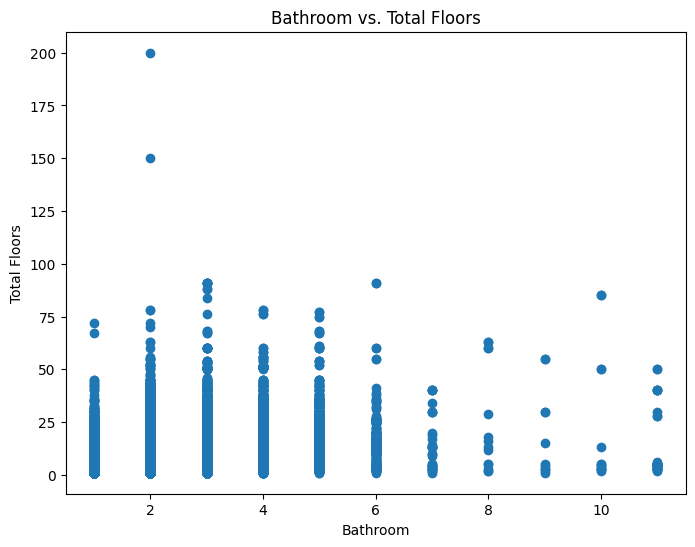

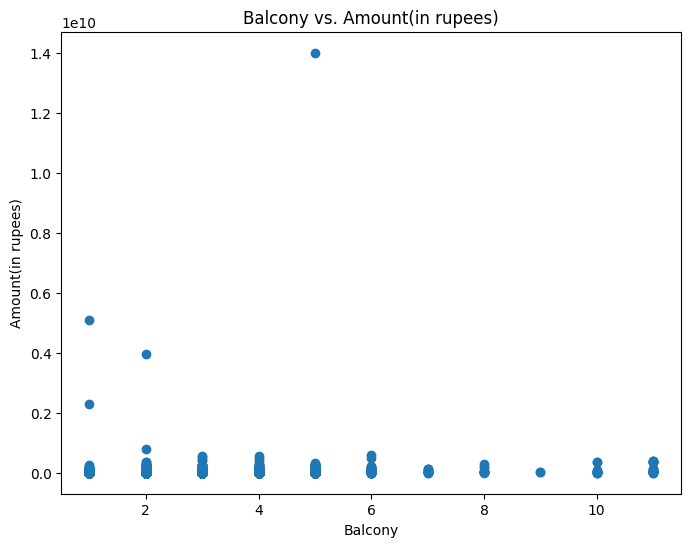

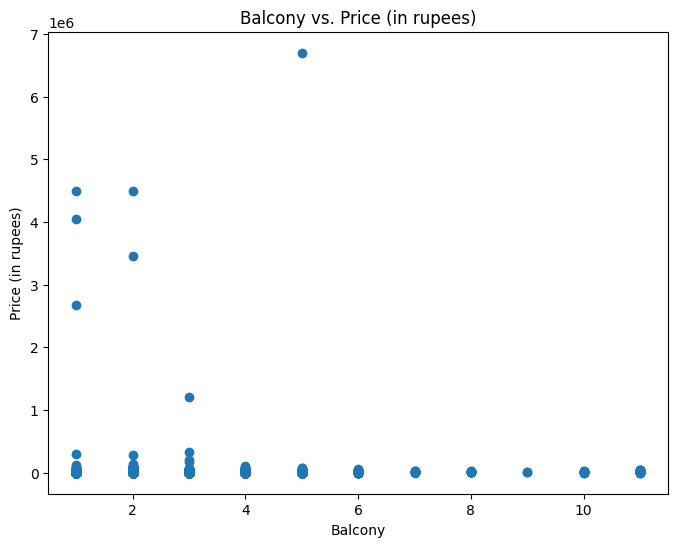

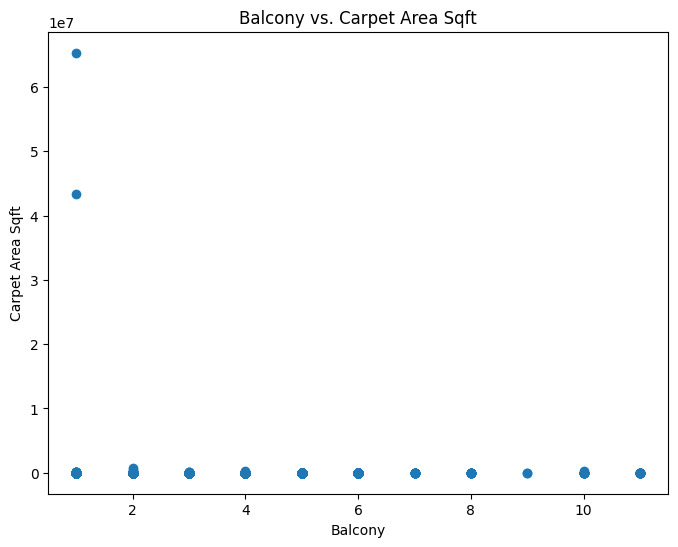

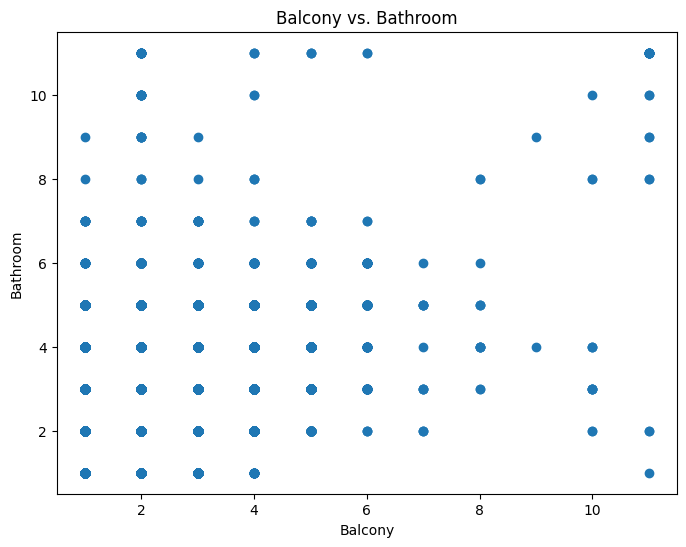

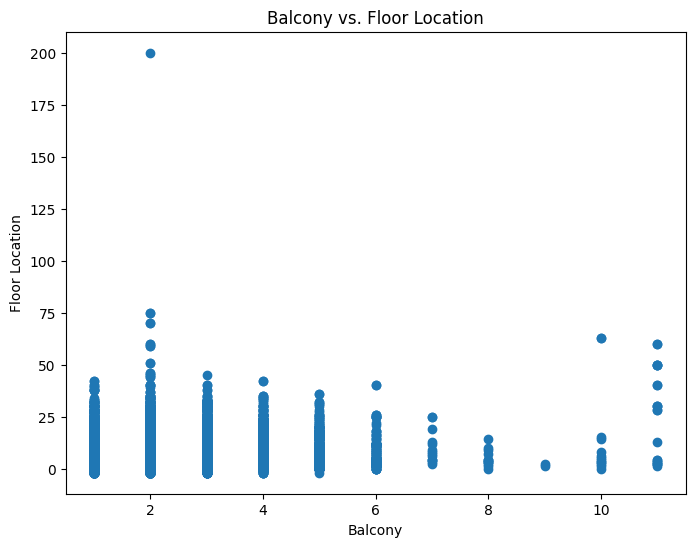

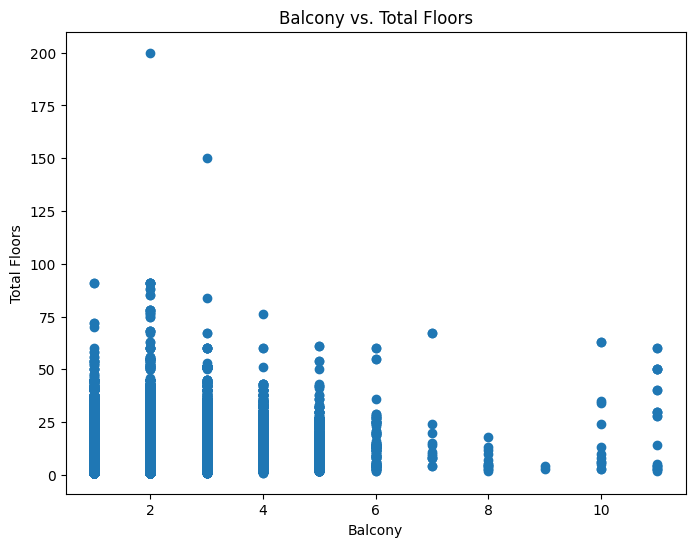

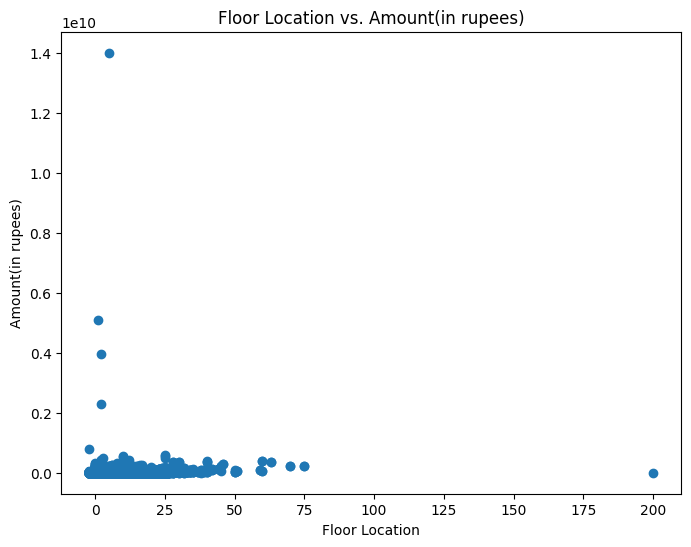

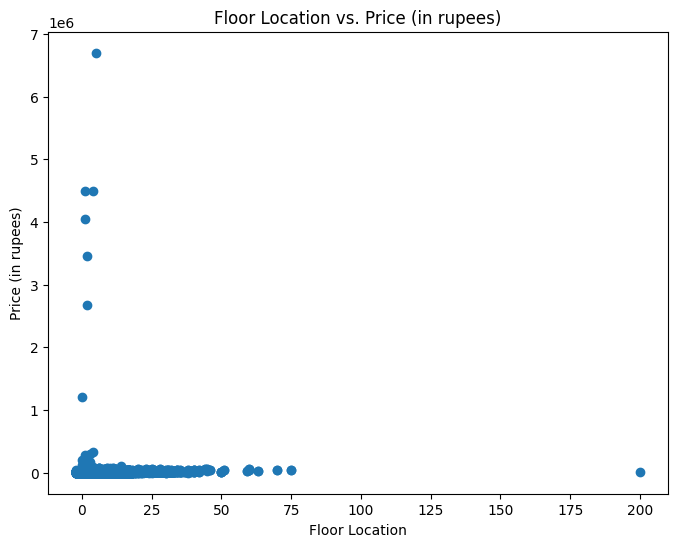

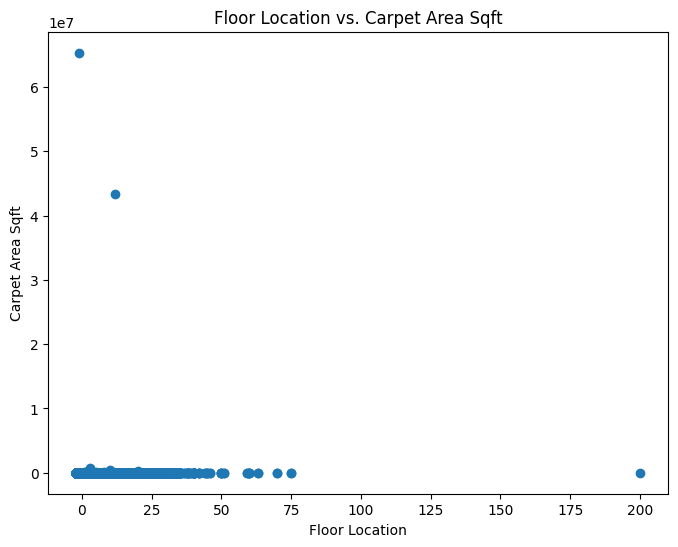

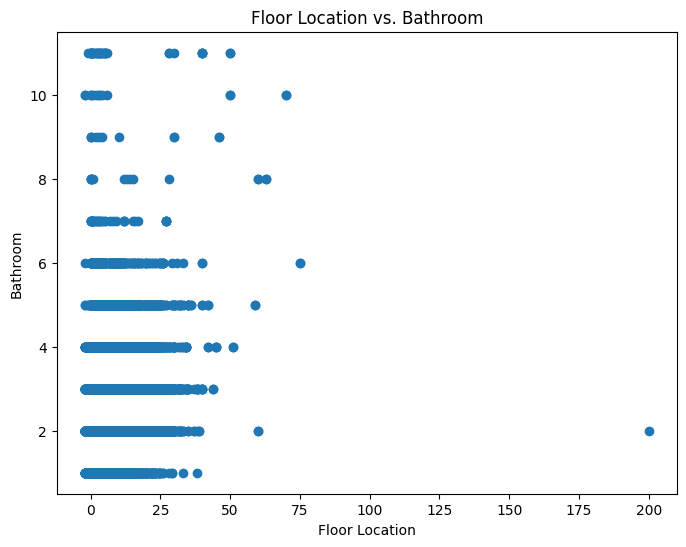

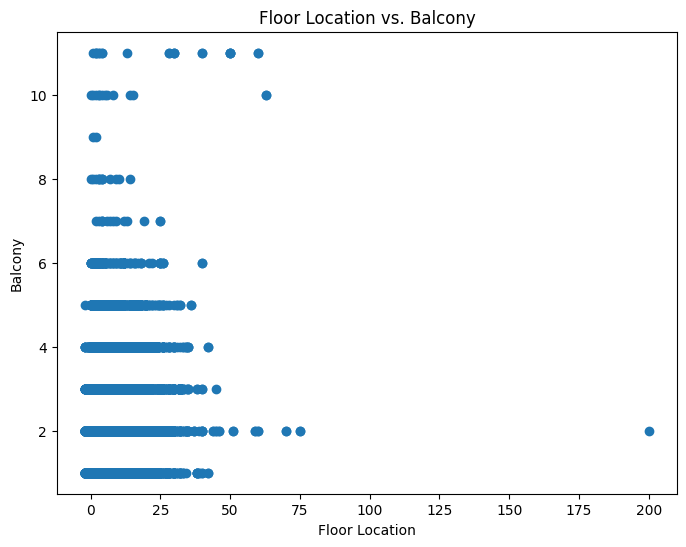

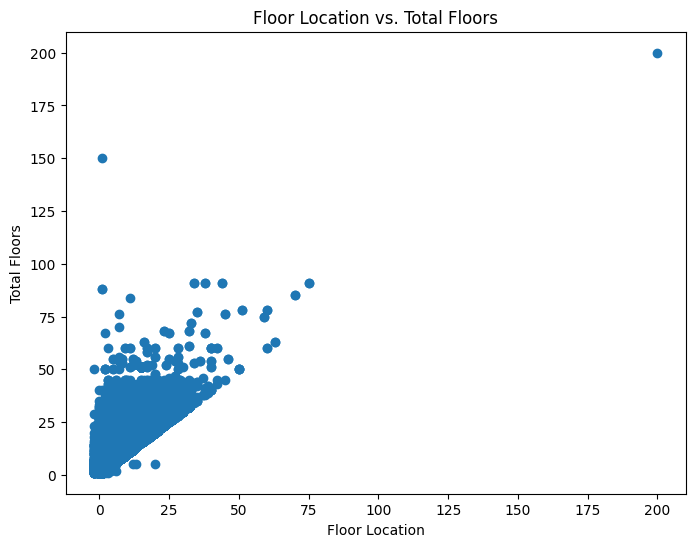

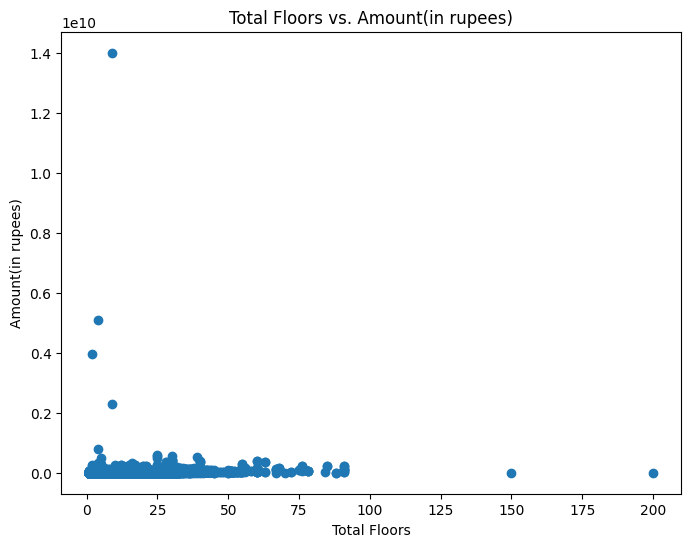

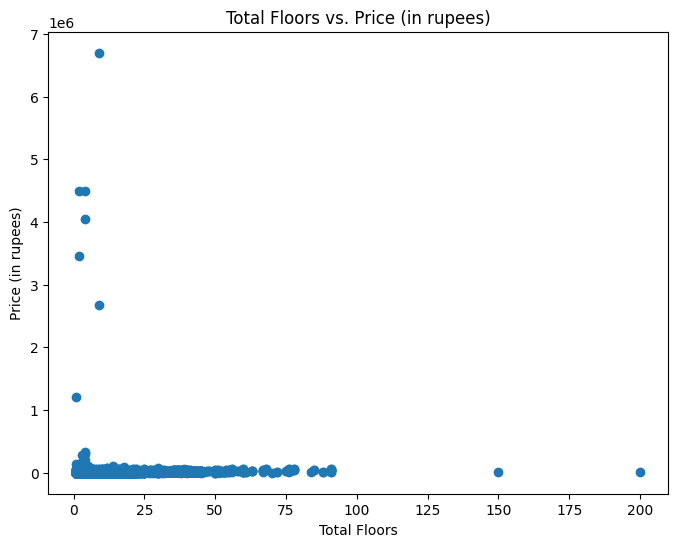

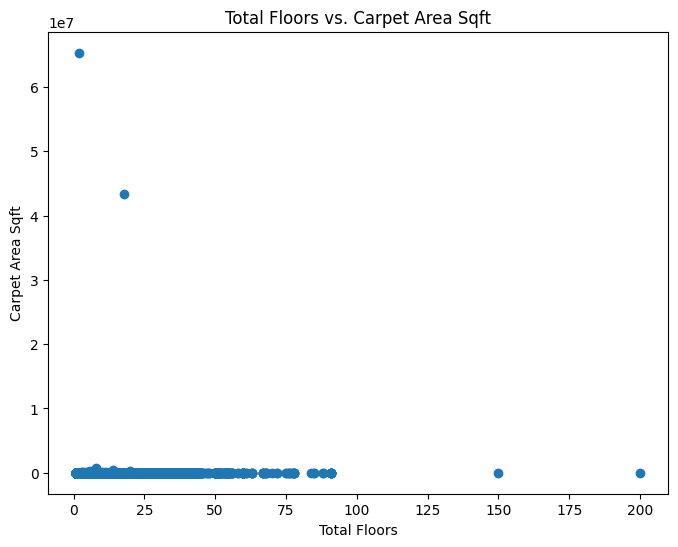

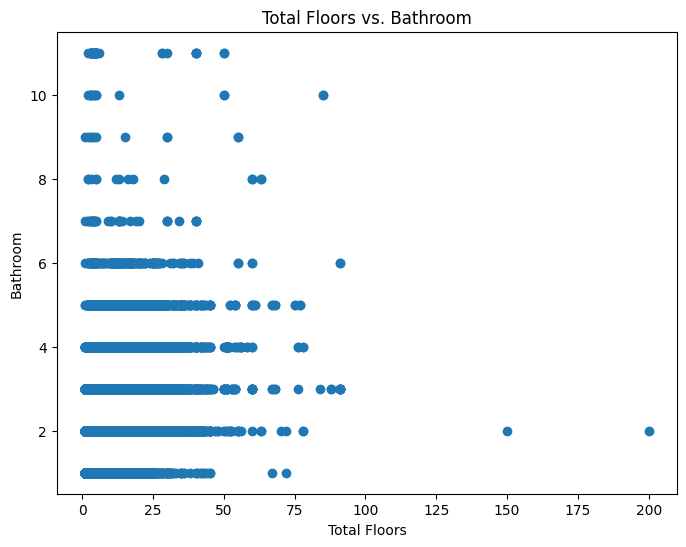

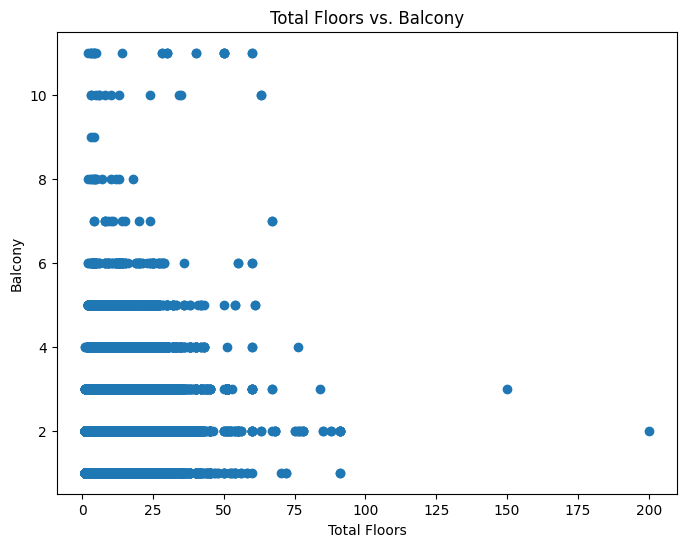

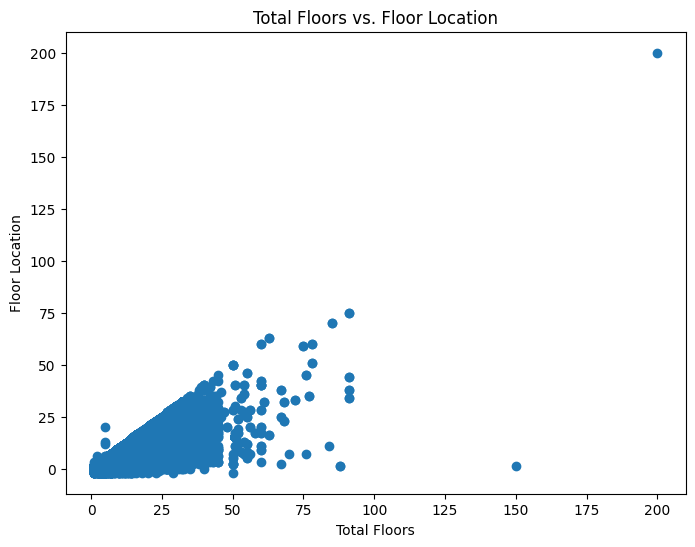

In [ ]:
# Bivariate analysis for numeric vs. numeric variables
numeric_vs_numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Carpet Area Sqft', 'Bathroom', 'Balcony', 'Floor Location', 'Total Floors']
for column1 in numeric_vs_numeric_columns:
    for column2 in numeric_vs_numeric_columns:
        if column1 != column2:
            plt.figure(figsize=(8, 6))
            plt.scatter(df_HP[column1], df_HP[column2])
            plt.title(f"{column1} vs. {column2}")
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

## PIE CHART

In [ ]:
# # Let's plot a pie chart for the 'Ownership' column
# plt.figure(figsize=(8, 8))
# df_HP.value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None, startangle=90)
# plt.axis('equal')
# plt.legend(labels=df_HP['Ownership'].value_counts().index, loc='best')
# plt.title("Distribution of Ownership")
# plt.show()

# MULTIVARIATE ANALYSIS

## HEAT MAP

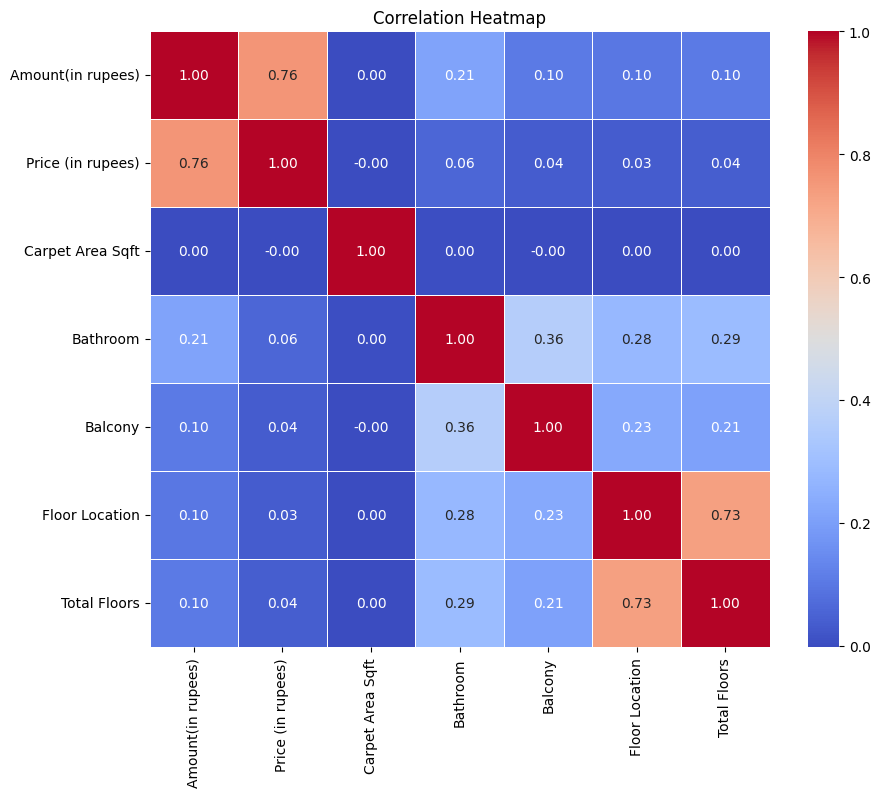

In [ ]:
# Let's plot a heatmap for the correlation matrix of numeric columns
num_cols =  ['Amount(in rupees)', 'Price (in rupees)', 'Carpet Area Sqft', 'Bathroom', 'Balcony', 'Floor Location', 'Total Floors']
plt.figure(figsize=(10, 8))
sns.heatmap(df_HP[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x800 with 0 Axes>

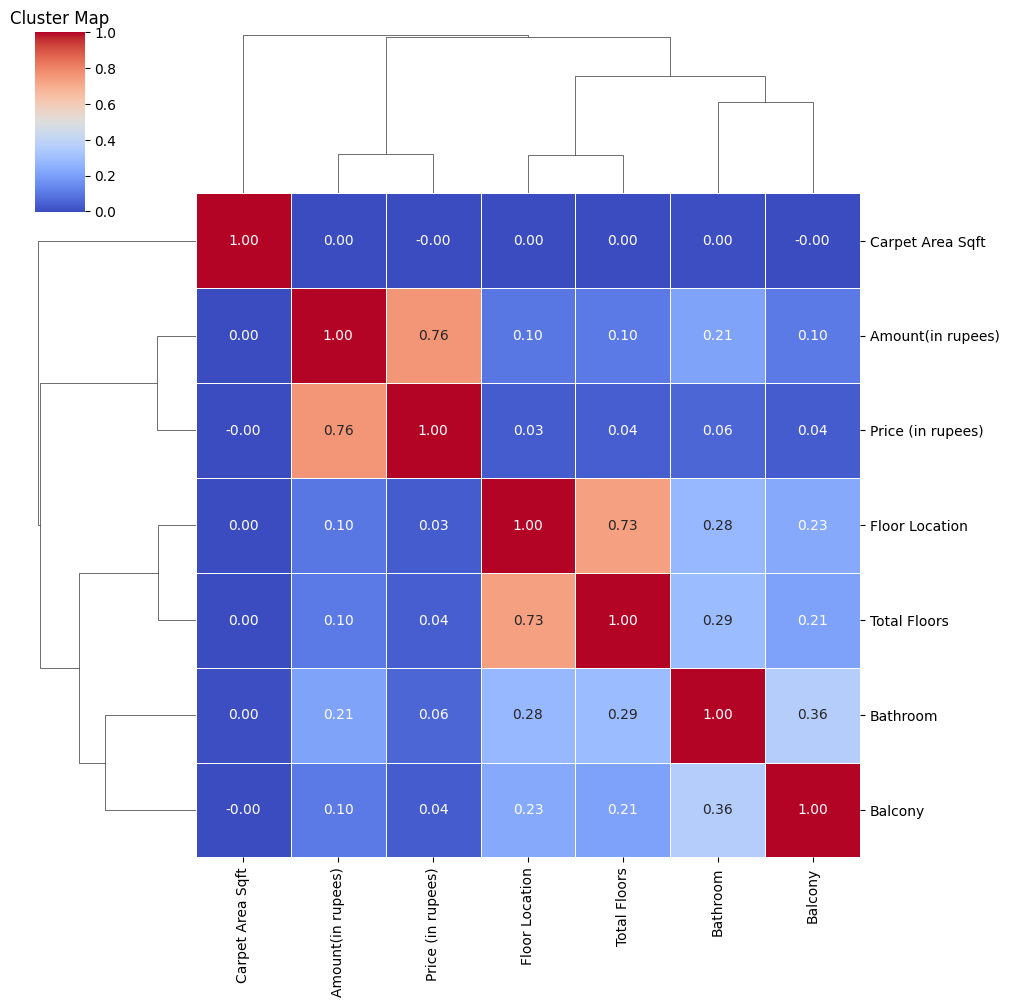

In [ ]:
# Let's plot a cluster map for the correlation matrix of numeric columns
plt.figure(figsize=(10, 8))
sns.clustermap(df_HP[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cluster Map")
plt.show()

# Feature Selection

In [ ]:
df_HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Amount(in rupees)  187531 non-null  float64
 3   Price (in rupees)  187531 non-null  float64
 4   location           187531 non-null  object 
 5   Transaction        187531 non-null  object 
 6   Furnishing         187531 non-null  object 
 7   facing             187531 non-null  object 
 8   Bathroom           187531 non-null  int64  
 9   Balcony            187531 non-null  int64  
 10  Ownership          187531 non-null  object 
 11  Carpet Area Sqft   187531 non-null  float64
 12  Floor Location     187531 non-null  float64
 13  Total Floors       187531 non-null  float64
 14  Main Road          187531 non-null  int64  
 15  Garden/Park        187531 non-null  int64  
 16  Po

In [ ]:
df_HP.drop(columns=['Title','Index'],inplace=True)

# Handling categorical data
So far, we have only been working with numerical values. However, it is not uncommon for real-world
datasets to contain one or more categorical feature columns.

When we are talking about categorical data, we have to further distinguish between **ordinal** and **nominal** features.
 - **Ordinal** features can be understood as categorical values that can be sorted or ordered.
For example, t-shirt size would be an ordinal feature, because we can define an order: XL > L > M. In
contrast.
 - **nominal** features don’t imply any order; to continue with the previous example, we could
think of t-shirt color as a nominal feature since it typically doesn’t make sense to say that, for example,
red is larger than blue.

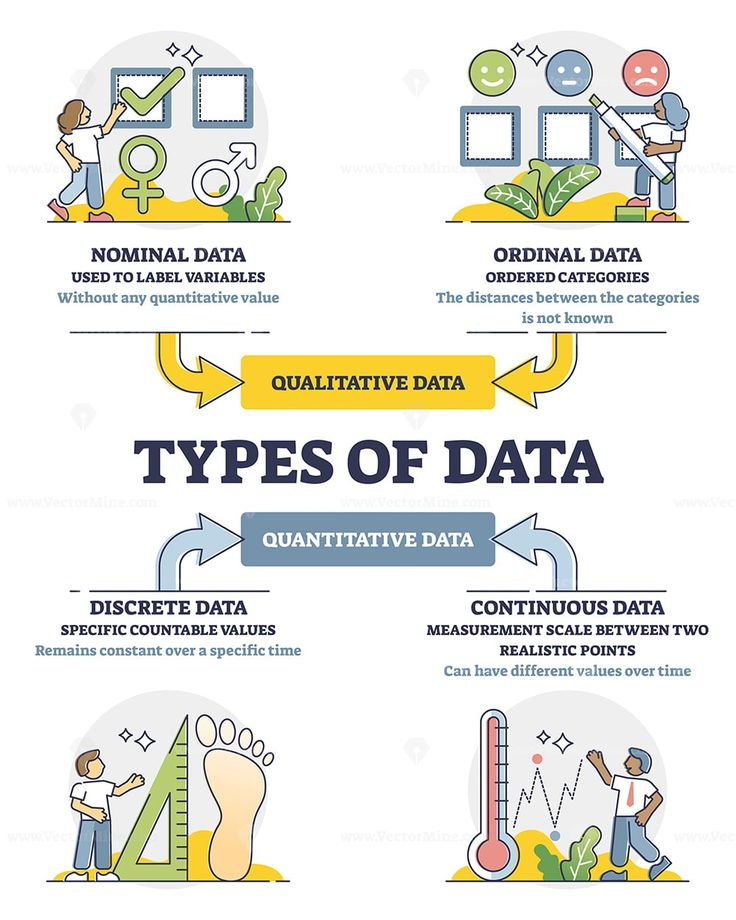

##  Encoding class labels


In [ ]:
categorical_df = df_HP.select_dtypes(include=['object'])
cols = list(categorical_df.columns)
for col in cols:
  print(col)
  print(df_HP[col].value_counts())
  print("     ###      ")


location
location
new-delhi      27599
bangalore      24030
kolkata        22380
gurgaon        20070
ahmedabad      12750
               ...  
nellore           30
pondicherry       30
navsari           30
palakkad          30
solapur           30
Name: count, Length: 81, dtype: int64
     ###      
Transaction
Transaction
Resale          144255
New Property     42565
Other              709
Rent/Lease           2
Name: count, dtype: int64
     ###      
Furnishing
Furnishing
Semi-Furnished    91215
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64
     ###      
facing
facing
East            124974
North - East     24220
North            16533
West              8574
South             4694
North - West      3843
South - East      2622
South -West       2071
Name: count, dtype: int64
     ###      
Ownership
Ownership
Freehold                177746
Leasehold                 5285
Co-operative Society      3431
Power Of Attorney         1069
Name: count, dtype: int

- **we will encode them properly based on their type (nominal or ordinal)**

  - location (nominal)
  - Transaction (nominal)
  - facing (ordinal)
  - Ownership (nominal)
  - Furnishing (ordinal)

### Encoding location - nominal

Use One-Hot Encoding or Label Encoding.

If number of unique cities is large (you have 81), prefer **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_HP['location'] = le.fit_transform(df_HP['location'])

### Encoding Transection - Ordinal

In [ ]:
transaction_map = {'Other': 0, 'Rent/Lease': 1, 'New Property': 2, 'Resale': 3}
df_HP['Transaction'] = df_HP['Transaction'].map(transaction_map)

### Encoding facing - nominal

In [ ]:
df_HP['facing'] = le.fit_transform(df_HP['facing'])

### Encoding Ownership - nominal

In [ ]:
df_HP['Ownership'] = le.fit_transform(df_HP['Ownership'])

### Encoding Furnishing -ordinal

In [ ]:
Furnishing_map = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}
df_HP['Furnishing'] = df_HP['Furnishing'].map(Furnishing_map)

In [ ]:
df_HP.head(25)

,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Carpet Area Sqft,Floor Location,Total Floors,Main Road,Garden/Park,Pool
0,4200000.0,6000.0,67,3,0,0,1,2,1,500.0,10.0,11.0,0,0,0
1,9800000.0,13799.0,67,3,1,0,2,2,1,473.0,3.0,22.0,0,1,0
2,14000000.0,17500.0,67,3,0,0,2,2,1,779.0,10.0,29.0,0,1,0
3,2500000.0,6034.0,67,3,0,0,1,1,1,530.0,1.0,3.0,0,0,0
4,16000000.0,18824.0,67,3,0,7,2,2,0,635.0,20.0,42.0,1,1,0
5,4500000.0,6618.0,67,3,0,0,1,1,0,1068.0,2.0,7.0,1,1,0
6,1650000.0,2538.0,67,3,0,0,1,2,1,550.0,4.0,5.0,0,0,0
7,6000000.0,10435.0,67,3,2,0,1,2,1,1068.0,0.0,7.0,0,0,0
8,6000000.0,10000.0,67,3,2,0,1,2,0,1068.0,0.0,2.0,0,0,0
9,16000000.0,11150.0,67,3,0,0,3,1,1,900.0,3.0,27.0,0,1,0


#  Partitioning a dataset into separate training and test datasets

Dividing a
dataset into training and test datasets is all about balancing this tradeoff.
the
most commonly used splits are 60:40, 70:30, or 80:20, depending on the size of the initial
dataset. However, for large datasets, 90:10 or 99:1 splits are also common and appropriate.
For example, if the dataset contains more than 100,000 training examples, it might be fine
to withhold only 10,000 examples for testing in order to get a good estimate of the gener
alization performance

In [ ]:
X = df_HP.drop(columns=['Amount(in rupees)'])
y = df_HP['Amount(in rupees)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# ML Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'{model_name}:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print('----------------------------------------')

Linear Regression:
R-squared: 0.46
Mean Absolute Error (MAE): 5040962.47
Root Mean Squared Error (RMSE): 47141545.21
----------------------------------------
Random Forest:
R-squared: 0.25
Mean Absolute Error (MAE): 964321.25
Root Mean Squared Error (RMSE): 55481677.45
----------------------------------------
Gradient Boosting:
R-squared: 0.15
Mean Absolute Error (MAE): 2072477.48
Root Mean Squared Error (RMSE): 59194957.66
----------------------------------------


# STANDARD SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df_HP)
df_HP = pd.DataFrame(df_standardized, columns=df_HP.columns)

In [ ]:
X = df_HP.drop(columns=['Amount(in rupees)'])
y = df_HP['Amount(in rupees)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'{model_name}:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print('----------------------------------------')

Linear Regression:
R-squared: 0.46
Mean Absolute Error (MAE): 0.13
Root Mean Squared Error (RMSE): 1.23
----------------------------------------
Random Forest:
R-squared: 0.26
Mean Absolute Error (MAE): 0.03
Root Mean Squared Error (RMSE): 1.43
----------------------------------------
Gradient Boosting:
R-squared: 0.13
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 1.56
----------------------------------------


## FEATURE SELECTION

Feature selection is a process where you automatically select those features in your data that
contribute most to the prediction variable or output in which you are interested.

## Assessing feature importance with random forests


 1) Price (in rupees)              0.629390
 2) Bathroom                       0.181626
 3) Carpet Area Sqft               0.065759
 4) location                       0.022105
 5) Floor Location                 0.019760
 6) Balcony                        0.013595
 7) Total Floors                   0.013001
 8) Transaction                    0.012900
 9) Garden/Park                    0.011797
10) Furnishing                     0.011167
11) Main Road                      0.008043
12) Pool                           0.007884
13) facing                         0.002533
14) Ownership                      0.000440


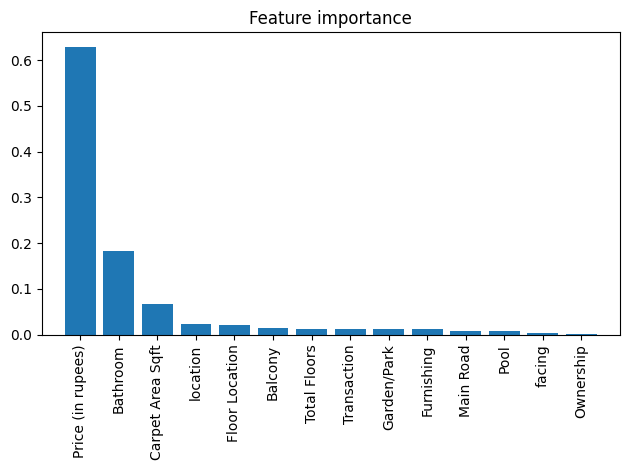

In [ ]:
from sklearn.ensemble import RandomForestRegressor
feat_labels = X_train.columns
forest = RandomForestRegressor(n_estimators=500,random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],     importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
         importances[indices],
         align='center')
plt.xticks(range(X_train.shape[1]),
            feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold','criterion:', X_selected.shape[1])
for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of features that meet this threshold criterion: 10
 1) Price (in rupees)              0.629390
 2) Bathroom                       0.181626
 3) Carpet Area Sqft               0.065759
 4) location                       0.022105
 5) Floor Location                 0.019760
 6) Balcony                        0.013595
 7) Total Floors                   0.013001
 8) Transaction                    0.012900
 9) Garden/Park                    0.011797
10) Furnishing                     0.011167
